# Анализ рынка вакансий для HR Агентства

                                                    Цель
                                                    
Выявить признаки вакансий, привлекающих наибольшее внимание кандидатов и успешно закрывающихся силами агентства.
В рамках выполнения данной задачи можно использовать любые методы и средства, даже если они не описаны в ТЗ.


- Загрузка данных

- Предобработка данных

- Исследовательский анализ данных, генерация новых признаков

- Построение воронки закрытия вакансии

- Выдвижение гипотез и их опровержение / проверка

- Подготовка презентации, понятной даже не-специалисту.



# Чтение данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn 
import seaborn as sns
import numpy as np
from scipy import stats
from collections import Counter
df = pd.read_excel('vacancy_clear.xlsx')
df

,id,Статус,Источник лида,Менеджер,Дата публикации,Дата закрытия,Количество просмотров,Количество откликов,Позиция,Зарплата от,...,Формат оформления,Формат работы,Опыт,Образование,Занятость,Ссылка на тестовое,Обязательные требования,Дополнительный требования,Этапы отбора,Условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,...,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме_x000D_\n- Техническое интерв...,У нас вы получите возможность:_x000D_\n- Работ...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,...,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение_...,1. Скрининг резюме_x000D_\n2. Тестовое задание...,Стабильный оклад + премия по итогам года/проек...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,2068,Активна,Повторная,менеджер 3,2023-12-22,NaN,4,2,Product Manager,80000.0,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,Опыт проведения CustDev_x000D_\nЖелание погруз...,NaN,1. Скрининг резюме_x000D_\n2. Собеседование,Парт-тайм занятость с постепенным погружением ...
1280,2070,Активна,Реферальная,менеджер 9,2023-12-22,NaN,2,2,Android/ IOS Developer,NaN,...,Самозанятость,"Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Проектная,нет,Нужен разработчик мобильных приложений (ios и/...,NaN,1. Скрининг резюме_x000D_\n2. Собеседование,"Удаленка, но можно приходить в офис Яндекса пе..."
1281,2071,Активна,Сорсинг,менеджер 9,2023-12-22,NaN,4,1,Product Manager,80000.0,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,Понимание проведений исследований _x000D_\nГот...,NaN,1. Скрининг резюме _x000D_\n2. Собеседование,Парт-тайм с постепенным развитием в проекта и ...
1282,2072,Активна,Повторная,менеджер 9,2023-12-29,NaN,3,1,Product Manager,100000.0,...,"ИП, Трудовой договор","Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,● наличие опыта в продуктовом менеджмента; _x0.

id - Уникальный идентификатор вакансии


Статус - Статус вакансии. Категориальное значение. 
Возможные значения:
- Архив - вакансия закрыта, не удалось найти подходящую кандидатуру силами агентства;
- Закрыта нами - вакансия закрыта, подходящая кандидатура найдена силами агентства;
- Активна - вакансия опубликована, идет активный поиск кандидатов;
- На рассмотрении - пул кандидатов набран, заказчик осуществляет отбор, набор новых кандидатов не ведется;
- Отклонена - заказчик отказался от рассмотрения пула кандидатов, набор кандидатов не ведется;
- Черновик - вакансия в стадии заполнения.


Источник лида - Источник вакансии.Категориальное значение.
Возможные значения:
- Входящая заявка - заказчик сам заполнил форму на сайте КА;
- Сорсинг - менеджеры КА привлекли заказчика исходящим поиском;
- Повторная - это не первая вакансия компании, подбор на которую будет делать КА;
- Реферальная - заказчик пришел в КА по рекомендации от другого заказчика.


Менеджер - Менеджер, ответственный за вакансию. Возможны пустые значения в связи с тем, что это поле сначала не существовало, потом было не обязательным к заполнению.


Дата публикации - Дата, когда вакансия была опубликована на сайте КА.


Дата закрытия - Дата, когда заказчик одобрил кандидата КА или отказался от услуг КА по данной вакансии.


Количество просмотров- Количество уникальных пользователей сайта, кликнувших на заголовок вакансии, чтобы увидеть всю вакансию.


Количество откликов - Количество уникальных пользователей сайта, отправивших отклик на вакансию.


Позиция - Название вакансии


Зарплата от - Нижняя граница заработной платы для вакансии. Поля может быть пустым.
Зарплата до - Верхняя граница заработной платы для вакансии. Поле может быть пустым.
 
 
Город - В каких городах предлагается работа вне зависимости от формата. Например, может быть указан город Москва - при этом занятость необязательно офисная, поэтому кандидат может находиться в другой локации.


Формат оформления - Какой формат оформления предлагает заказчик.

Формат работы - Какой формат работы предлагает заказчик.

Опыт- Какой опыт работы должен быть у соискателя.

Образования - Какое образование должно быть у соискателя.

Ссылка на тестовое - Есть ли ссылка на тестовое задание в описании вакансии.

Занятость - Какой формат занятости предлагает заказчик.

Обязательные требования - Какие обязательные требования предъявляет заказчик к кандидатам.

Дополнительный требования - Какие дополнительные требования предъявляет заказчик к кандидатам.

Этапы отбора - Этапы отбора на должность

Условия - Краткое текстовое описание условий вакансии. Может повторять информацию из других столбцов



# Предобработка данных

Переведем названия столбцов в нижний регистр

In [2]:
df.columns = df.columns.str.lower()

Выведем основную информацию о датафрейме

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         1284 non-null   int64  
 1   статус                     1284 non-null   object 
 2   источник лида              1274 non-null   object 
 3   менеджер                   1193 non-null   object 
 4   дата публикации            1284 non-null   object 
 5   дата закрытия              1127 non-null   object 
 6   количество просмотров      1284 non-null   int64  
 7   количество откликов        1284 non-null   int64  
 8   позиция                    1284 non-null   object 
 9   зарплата от                469 non-null    float64
 10  зарплата до                372 non-null    float64
 11  город                      1284 non-null   object 
 12  формат оформления          1284 non-null   object 
 13  формат работы              1284 non-null   objec

In [4]:
# Преобразование строк в формат datetime
df['дата публикации'] = pd.to_datetime(df['дата публикации'])
df['дата закрытия'] = pd.to_datetime(df['дата закрытия'])

In [5]:
df.columns

Index(['id', 'статус', 'источник лида', 'менеджер', 'дата публикации',
       'дата закрытия', 'количество просмотров', 'количество откликов',
       'позиция', 'зарплата от', 'зарплата до', 'город', 'формат оформления',
       'формат работы', 'опыт', 'образование', 'занятость',
       'ссылка на тестовое', 'обязательные требования',
       'дополнительный требования', 'этапы отбора', 'условия'],
      dtype='object')

Уникальные значения в алфавитном порядке

In [6]:
set(df['позиция'].unique())

{'AI-разработчик junior',
 'AQA Java Trainee',
 'Account менеджер в маркетинговое агентство',
 'Android/ IOS Developer',
 'Angular Junior Developer',
 'BI Analyst',
 'BI аналитик',
 'Back-end разработчик (Python)',
 'Backend Java Разработчик',
 'Backend разработчик',
 'Backend разработчик (python)',
 'Backend-разработчик',
 'Backend-разработчик со знанием frontend',
 'C++ разработчик',
 'CRM-маркетолог',
 'Crowd Solutions Architect',
 'Cтажер-разработчик Python (Data Engineer)',
 'Data Analyst',
 'Data Analyst в команду аналитики маркетинговых акций',
 'Data Analyst, Data Scientist',
 'Data Engineer',
 'Data Scientist',
 'Data Scientist в Отдел финансовой аналитики продаж.',
 'Data Scientist в проект',
 'Data science/Аналитик данных',
 'DevOps engineer',
 'DevOps инженер',
 'DevOps инженер (Linux)',
 'Digital маркетолог',
 'Digital-маркетолог',
 'Digital-менеджер',
 'Django разработчик',
 'E-commerce менеджер',
 'Front-end разработчик / HTML-верстальщик',
 'Front-end разработчик React/

Количество явных дубликатов

In [7]:
df.duplicated().sum()

0

Построим общую гистограмму для всех столбцов

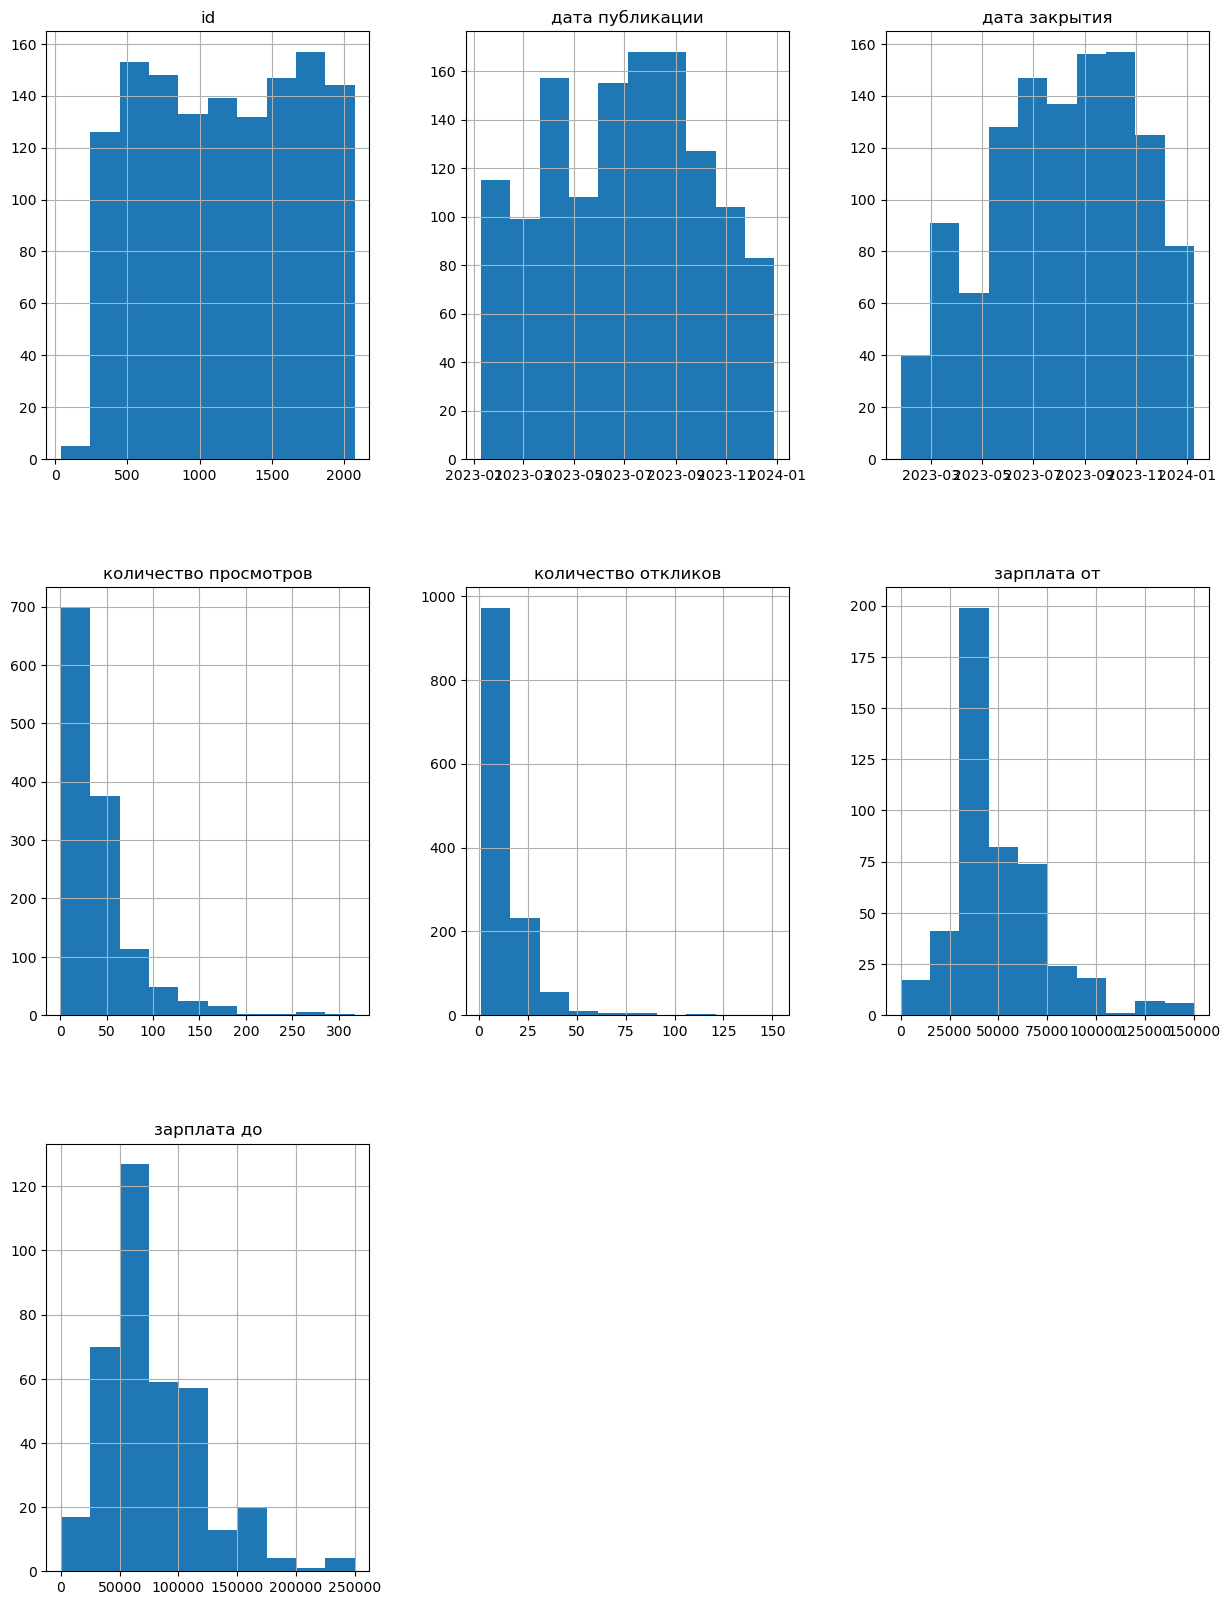

In [8]:
df.hist(figsize=(15, 20))
plt.show()

Изучим пропущенные значения в столбцах

In [9]:
df.isna().mean().sort_values(ascending=False)

зарплата до                  0.710280
зарплата от                  0.634735
дополнительный требования    0.486760
дата закрытия                0.122274
менеджер                     0.070872
источник лида                0.007788
id                           0.000000
опыт                         0.000000
этапы отбора                 0.000000
обязательные требования      0.000000
ссылка на тестовое           0.000000
занятость                    0.000000
образование                  0.000000
город                        0.000000
формат работы                0.000000
формат оформления            0.000000
статус                       0.000000
позиция                      0.000000
количество откликов          0.000000
количество просмотров        0.000000
дата публикации              0.000000
условия                      0.000000
dtype: float64

Построим температурный график по количеству пропусков

In [10]:
pd.DataFrame(df.isna().mean().to_frame(name='Пропуски').query('Пропуски > 0')['Пропуски'])\
            .style.background_gradient('coolwarm')\
            .format({'Пропуски':'{:.0%}'})

,Пропуски
источник лида,1%
менеджер,7%
дата закрытия,12%
зарплата от,63%
зарплата до,71%
дополнительный требования,49%


# Исследовательский анализ данных

In [11]:
df

,id,статус,источник лида,менеджер,дата публикации,дата закрытия,количество просмотров,количество откликов,позиция,зарплата от,...,формат оформления,формат работы,опыт,образование,занятость,ссылка на тестовое,обязательные требования,дополнительный требования,этапы отбора,условия
0,40,Архив,Повторная,менеджер 9,2023-08-30,2023-08-30,153,35,Стажёр Python разработчик (неоплачиваемая стаж...,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Проектная, Частичная",нет,"Наш стек: Python, fastapi, postgres, gitlab\nП...","Основные требования к ребятам, которые хотели ...",Техническое задание и интервью,Школа бесплатна и сотрудничает с фондами.\n\nС...
1,104,Архив,Входящая заявка,менеджер 6,2023-08-22,2023-08-22,188,4,Технический интервьюер,NaN,...,ГПХ,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Частичная,нет,"1) Широкий IT-кругозор, понимание, какие бываю...",NaN,1) тестовое задание\n2) онлайн собеседование с...,ставка 750 рублей - за 1 обработанного кандида...
2,157,Архив,Реферальная,менеджер 9,2023-08-28,2023-10-03,37,8,JS-разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Удаленка,"До 1 года опыта, возможен опыт в pet-проектах","Другое, На смежных специальностях, Профильное",Полная,нет,умение самостоятельно разбираться в чужом коде...,Опыт коммерческой разработки на JS будет больш...,- Отклик с сопроводительным письмом обязательн...,"- Работа удаленная, оплата в форме оклада.\n- ..."
3,181,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,33,7,Младший разработчик,NaN,...,"ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...",Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- Высшее IT/техническое образование либо после...,- Базовое понимание объектов БД и их применени...,- Скрининг резюме_x000D_\n- Техническое интерв...,У нас вы получите возможность:_x000D_\n- Работ...
4,184,Архив,Входящая заявка,NaN,2023-08-24,2023-08-24,51,13,Младший аналитик,NaN,...,Трудовой договор,Офис,"До 1 года опыта, возможен опыт в pet-проектах;...","На смежных специальностях, Профильное",Полная,нет,- ОБЯЗАТЕЛЬНО - Высшее ИТ/техническое образова...,Базовое понимание объектов БД и их применение_...,1. Скрининг резюме_x000D_\n2. Тестовое задание...,Стабильный оклад + премия по итогам года/проек...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,2068,Активна,Повторная,менеджер 3,2023-12-22,NaT,4,2,Product Manager,80000.0,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,Опыт проведения CustDev_x000D_\nЖелание погруз...,NaN,1. Скрининг резюме_x000D_\n2. Собеседование,Парт-тайм занятость с постепенным погружением ...
1280,2070,Активна,Реферальная,менеджер 9,2023-12-22,NaT,2,2,Android/ IOS Developer,NaN,...,Самозанятость,"Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Проектная,нет,Нужен разработчик мобильных приложений (ios и/...,NaN,1. Скрининг резюме_x000D_\n2. Собеседование,"Удаленка, но можно приходить в офис Яндекса пе..."
1281,2071,Активна,Сорсинг,менеджер 9,2023-12-22,NaT,4,1,Product Manager,80000.0,...,Самозанятость,Удаленка,"До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное","Частичная, Полная",нет,Понимание проведений исследований _x000D_\nГот...,NaN,1. Скрининг резюме _x000D_\n2. Собеседование,Парт-тайм с постепенным развитием в проекта и ...
1282,2072,Активна,Повторная,менеджер 9,2023-12-29,NaT,3,1,Product Manager,100000.0,...,"ИП, Трудовой договор","Офис, Гибрид, Удаленка","До 1 года опыта, возможен опыт в pet-проектах;...","Другое, На смежных специальностях, Профильное",Полная,нет,● наличие опыта в продуктовом менеджмента; _x0.

In [12]:
df.columns

Index(['id', 'статус', 'источник лида', 'менеджер', 'дата публикации',
       'дата закрытия', 'количество просмотров', 'количество откликов',
       'позиция', 'зарплата от', 'зарплата до', 'город', 'формат оформления',
       'формат работы', 'опыт', 'образование', 'занятость',
       'ссылка на тестовое', 'обязательные требования',
       'дополнительный требования', 'этапы отбора', 'условия'],
      dtype='object')

In [13]:
df.describe().round(1)

,id,количество просмотров,количество откликов,зарплата от,зарплата до
count,1284.0,1284.0,1284.0,469.0,372.0
mean,1168.1,40.2,11.5,47064.7,74808.9
std,530.7,38.7,12.7,25321.9,41501.8
min,40.0,1.0,1.0,0.0,0.0
25%,696.8,15.0,4.0,30000.0,50000.0
50%,1171.5,30.0,8.0,40000.0,65000.0
75%,1635.5,51.0,15.0,60000.0,100000.0
max,2073.0,317.0,151.0,150000.0,250000.0


Из предоставленной статистики по количеству просмотров и откликов, а также зарплатным ожиданиям вакансий, можно сделать следующие наблюдения:

Количество просмотров:

Среднее количество просмотров вакансии составляет примерно 1168, при стандартном отклонении 530.7.
Минимальное количество просмотров у вакансии - 40, а максимальное - 2073.
25% вакансий имеют менее 697 просмотров, 50% - менее 1172, а 75% - менее 1636.
Количество откликов:

Среднее количество откликов на вакансии составляет примерно 40.2, со стандартным отклонением 38.7.
Минимальное количество откликов у вакансии - 1, а максимальное - 317.
25% вакансий имеют менее 15 откликов, 50% - менее 30, а 75% - менее 51.
Зарплатные ожидания:

Средняя зарплата "от" составляет примерно 47065, а "до" - 74809.
Минимальная зарплата "от" - 0, а "до" - 0, что может указывать на вакансии с неопределенными или обсуждаемыми зарплатными условиями.
25% вакансий предлагают зарплату "от" менее 30000, "до" - менее 50000. 50% вакансий предлагают зарплату "от" менее 40000, "до" - менее 65000. 75% вакансий предлагают зарплату "от" менее 60000, "до" - менее 100000.

In [14]:
df['статус'].value_counts(dropna=False)

Архив              701
Закрыта нами       320
Отклонена          105
На рассмотрении     90
Активна             68
Name: статус, dtype: int64

In [15]:
df['источник лида'].value_counts(dropna=False)

Повторная          511
Сорсинг            330
Входящая заявка    217
Реферальная        216
NaN                 10
Name: источник лида, dtype: int64

In [16]:
df['менеджер'].value_counts(dropna=False)

менеджер 9    559
менеджер 1    227
менеджер 5    158
менеджер 7    135
NaN            91
менеджер 3     65
менеджер 2     38
менеджер 6      9
менеджер 8      1
менеджер 4      1
Name: менеджер, dtype: int64

In [17]:
df['позиция'].value_counts(dropna=False).head(50)

Project manager                      42
Интернет-маркетолог                  39
Аналитик данных                      35
Python-разработчик                   34
Фронтенд-разработчик                 32
UX/UI дизайнер                       31
Системный аналитик                   31
Менеджер проектов                    17
Frontend-разработчик                 14
IT-рекрутер                          14
Тестировщик                          14
Project Manager                      13
Специалист по контекстной рекламе    12
Frontend-разработчик (React)         10
Тестировщик (ручной)                 10
Product Manager                       9
Data Scientist                        9
Младший аналитик                      9
Junior Project Manager                9
Junior QA                             9
Java-разработчик                      8
Frontend разработчик                  8
Таргетолог                            8
Контекстолог                          8
DevOps инженер                        7


In [18]:
# Создание категорий
df['категория'] = 'Другие'

df.loc[df['позиция'].str.contains('Manager', case=False), 'категория'] = 'Менеджер'
df.loc[df['позиция'].str.contains('Маркетолог', case=False), 'категория'] = 'Маркетолог'
df.loc[df['позиция'].str.contains('Аналитик', case=False), 'категория'] = 'Аналитик'
df.loc[df['позиция'].str.contains('Разработчик', case=False), 'категория'] = 'Разработчик'
df.loc[df['позиция'].str.contains('Дизайнер', case=False), 'категория'] = 'Дизайнер'
df.loc[df['позиция'].str.contains('Тестировщик', case=False), 'категория'] = 'Тестировщик'
df.loc[df['позиция'].str.contains('Data Scientist', case=False), 'категория'] = 'Data Scientist'

In [19]:
df['город'].value_counts(dropna=False).head(50)

Москва                                                              870
Санкт-Петербург                                                     137
Москва, Санкт-Петербург                                              30
Казань                                                               21
Екатеринбург                                                         14
Тюмень                                                               11
Самара                                                               10
Будва                                                                10
Нижний Новгород                                                       9
Ростов-на-Дону                                                        8
Тула                                                                  7
Алматы                                                                7
Краснодар                                                             6
Новосибирск                                                     

In [20]:
# Создание категорий
df['категория_города'] = 'Другие'

df.loc[df['город'].str.contains('Москва', case=False), 'категория_города'] = 'Москва'
df.loc[df['город'].str.contains('Санкт-Петербург', case=False), 'категория_города'] = 'Санкт-Петербург'
df.loc[df['город'].str.contains('Казань', case=False), 'категория_города'] = 'Казань'

In [21]:
df['формат оформления'].value_counts(dropna=False)

ИП, ГПХ, Самозанятость, Контракт, Трудовой договор    484
Трудовой договор                                      334
Самозанятость                                         132
Контракт                                               70
Самозанятость, ИП                                      58
Самозанятость, Контракт, ИП, ГПХ                       57
Самозанятость, Трудовой договор                        21
ГПХ                                                    20
Самозанятость, ИП, ГПХ                                 15
Самозанятость, ИП, Трудовой договор                    14
Трудовой договор, ГПХ                                  13
Самозанятость, ГПХ                                     12
Контракт, Трудовой договор                             11
Самозанятость, ИП, Контракт                             7
Контракт, Трудовой договор, ГПХ                         6
Контракт, ГПХ                                           6
Самозанятость, ИП, Трудовой договор, ГПХ                5
Самозанятость,

In [22]:
# Преобразование столбца "формат оформления" в бинарные категории
df['ИП'] = df['формат оформления'].apply(lambda x: 1 if 'ИП' in x else 0)
df['ГПХ'] = df['формат оформления'].apply(lambda x: 1 if 'ГПХ' in x else 0)
df['Самозанятость'] = df['формат оформления'].apply(lambda x: 1 if 'Самозанятость' in x else 0)
df['Контракт'] = df['формат оформления'].apply(lambda x: 1 if 'Контракт' in x else 0)
df['Трудовой договор'] = df['формат оформления'].apply(lambda x: 1 if 'Трудовой договор' in x else 0)

# Визуальная проверка результатов
print(df[['формат оформления', 'ИП', 'ГПХ', 'Самозанятость', 'Контракт', 'Трудовой договор']])

                                      формат оформления  ИП  ГПХ  \
0     ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...   1    1   
1                                                   ГПХ   0    1   
2     ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...   1    1   
3     ИП, ГПХ, Самозанятость, Контракт, Трудовой дог...   1    1   
4                                      Трудовой договор   0    0   
...                                                 ...  ..  ...   
1279                                      Самозанятость   0    0   
1280                                      Самозанятость   0    0   
1281                                      Самозанятость   0    0   
1282                               ИП, Трудовой договор   1    0   
1283                                      Самозанятость   0    0   

      Самозанятость  Контракт  Трудовой договор  
0                 1         1                 1  
1                 0         0                 0  
2                 1         1    

In [23]:
df['формат работы'].value_counts(dropna=False)

Удаленка                  652
Офис, Гибрид              218
Офис, Гибрид, Удаленка    133
Офис                      106
Гибрид, Удаленка           99
Гибрид                     65
Офис, Удаленка             11
Name: формат работы, dtype: int64

In [24]:
# Создание бинарных признаков для формата работы
df['Удаленка'] = df['формат работы'].apply(lambda x: 1 if 'Удаленка' in x else 0)
df['Офис'] = df['формат работы'].apply(lambda x: 1 if 'Офис' in x else 0)
df['Гибрид'] = df['формат работы'].apply(lambda x: 1 if 'Гибрид' in x else 0)

# Визуальная проверка результатов
print(df[['формат работы', 'Удаленка', 'Офис', 'Гибрид']])

               формат работы  Удаленка  Офис  Гибрид
0                   Удаленка         1     0       0
1                   Удаленка         1     0       0
2                   Удаленка         1     0       0
3                       Офис         0     1       0
4                       Офис         0     1       0
...                      ...       ...   ...     ...
1279                Удаленка         1     0       0
1280  Офис, Гибрид, Удаленка         1     1       1
1281                Удаленка         1     0       0
1282  Офис, Гибрид, Удаленка         1     1       1
1283                Удаленка         1     0       0

[1284 rows x 4 columns]


In [25]:
df['опыт'].value_counts(dropna=False)

До 1 года опыта, возможен опыт в pet-проектах; без опыта    1180
До 1 года опыта, возможен опыт в pet-проектах                 76
Опыт от 1 года                                                26
Без опыта                                                      2
Name: опыт, dtype: int64

In [26]:
df['образование'].value_counts(dropna=False)

Другое, На смежных специальностях, Профильное    1240
На смежных специальностях, Профильное              42
Профильное                                          2
Name: образование, dtype: int64

In [27]:
df['занятость'].value_counts(dropna=False)

Полная                                                    774
Волонтерство, Проектная, Частичная, Стажировка, Полная     97
Стажировка                                                 82
Проектная, Частичная                                       59
Частичная                                                  42
Проектная                                                  40
Проектная, Частичная, Полная                               37
Частичная, Полная                                          33
Стажировка, Проектная, Частичная                           18
Стажировка, Полная                                         15
Проектная, Полная                                          15
Стажировка, Проектная                                      15
Стажировка, Частичная                                      13
Стажировка, Волонтерство, Проектная, Частичная              9
Стажировка, Волонтерство, Проектная                         7
Стажировка, Волонтерство, Частичная                         7
Стажиров

In [28]:
# Создание бинарных признаков для типов занятости
df['Полная занятость'] = df['занятость'].apply(lambda x: 1 if 'Полная' in x else 0)
df['Волонтерство'] = df['занятость'].apply(lambda x: 1 if 'Волонтерство' in x else 0)
df['Проектная'] = df['занятость'].apply(lambda x: 1 if 'Проектная' in x else 0)
df['Частичная занятость'] = df['занятость'].apply(lambda x: 1 if 'Частичная' in x else 0)
df['Стажировка'] = df['занятость'].apply(lambda x: 1 if 'Стажировка' in x else 0)

# Визуальная проверка результатов
print(df[['занятость', 'Полная занятость', 'Волонтерство', 'Проектная', 'Частичная занятость', 'Стажировка']])

                 занятость  Полная занятость  Волонтерство  Проектная  \
0     Проектная, Частичная                 0             0          1   
1                Частичная                 0             0          0   
2                   Полная                 1             0          0   
3                   Полная                 1             0          0   
4                   Полная                 1             0          0   
...                    ...               ...           ...        ...   
1279     Частичная, Полная                 1             0          0   
1280             Проектная                 0             0          1   
1281     Частичная, Полная                 1             0          0   
1282                Полная                 1             0          0   
1283            Стажировка                 0             0          0   

      Частичная занятость  Стажировка  
0                       1           0  
1                       1           0  
2  

In [29]:
df['ссылка на тестовое'].value_counts(dropna=False)

нет    1178
да      106
Name: ссылка на тестовое, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id                         1284 non-null   int64         
 1   статус                     1284 non-null   object        
 2   источник лида              1274 non-null   object        
 3   менеджер                   1193 non-null   object        
 4   дата публикации            1284 non-null   datetime64[ns]
 5   дата закрытия              1127 non-null   datetime64[ns]
 6   количество просмотров      1284 non-null   int64         
 7   количество откликов        1284 non-null   int64         
 8   позиция                    1284 non-null   object        
 9   зарплата от                469 non-null    float64       
 10  зарплата до                372 non-null    float64       
 11  город                      1284 non-null   object        
 12  формат

In [31]:
df['обязательные требования'].unique()

array(['Наш стек: Python, fastapi, postgres, gitlab\nПожелания:\n- Опыт использования одного из фреймворков/библиотек для написания сервисов на RESTful API\n- Понимание как работает асинхронность и многопоточность в Python\n- Знание основ Git\n- Базовое знание SQL',
       '1) Широкий IT-кругозор, понимание, какие бывают языки программирования и для чего они используются.\n2) Владение хотя быть одним современным языком программирования (Java, Python, PHP, C#, Go, JavaScript и/или C++), желательно знание на базовом уровне языка запросов SQL и базовые навыки вёрстки веб-страниц (HTML/CSS).\n3) Свободное владение разговорным английским языком.\n4) Системность, аналитический склад ума и умение чувствовать других людей.\n5) Желание и готовность проводить собеседования и оценивать специалистов',
       'умение самостоятельно разбираться в чужом коде;_x000D_\nопыт самостоятельной работы над коммерческими проектами;_x000D_\nспособность к самоорганизации и самодисциплине;_x000D_\nумение оценива

In [32]:
df['обязательные требования'].nunique()

1218

In [33]:
# Создание категорий
df['Python'] = df['обязательные требования'].str.contains('Python', case=False)
df['JavaScript'] = df['обязательные требования'].str.contains('JavaScript', case=False)
df['Опыт работы'] = df['обязательные требования'].str.contains('опыт работы', case=False)
df['Особые навыки'] = df['обязательные требования'].str.contains('Git|PostgreSQL|асинхронность|многопоточность', case=False)
df['Английский язык'] = df['обязательные требования'].str.contains('английский', case=False)
df['Самостоятельность и организованность'] = df['обязательные требования'].str.contains('самостоятельность|самостоятельная работа|организация времени', case=False)
df['Веб-разработка'] = df['обязательные требования'].str.contains('HTML|CSS|Vue.js', case=False)
df['Мобильная разработка'] = df['обязательные требования'].str.contains('iOS|Android', case=False)
df['Аналитические навыки'] = df['обязательные требования'].str.contains('аналитические навыки', case=False)
df['Управление продуктом'] = df['обязательные требования'].str.contains('продуктовом менеджменте|стратегическое мышление', case=False)

In [34]:
df['обязательные требования'].unique()

array(['Наш стек: Python, fastapi, postgres, gitlab\nПожелания:\n- Опыт использования одного из фреймворков/библиотек для написания сервисов на RESTful API\n- Понимание как работает асинхронность и многопоточность в Python\n- Знание основ Git\n- Базовое знание SQL',
       '1) Широкий IT-кругозор, понимание, какие бывают языки программирования и для чего они используются.\n2) Владение хотя быть одним современным языком программирования (Java, Python, PHP, C#, Go, JavaScript и/или C++), желательно знание на базовом уровне языка запросов SQL и базовые навыки вёрстки веб-страниц (HTML/CSS).\n3) Свободное владение разговорным английским языком.\n4) Системность, аналитический склад ума и умение чувствовать других людей.\n5) Желание и готовность проводить собеседования и оценивать специалистов',
       'умение самостоятельно разбираться в чужом коде;_x000D_\nопыт самостоятельной работы над коммерческими проектами;_x000D_\nспособность к самоорганизации и самодисциплине;_x000D_\nумение оценива

In [35]:
# Создаем функцию для категоризации дополнительных требований
def категоризировать_дополнительные_требования(текст_требования):
    текст_требования = текст_требования.lower()

    # Категория 1: Опыт и навыки в аналитике
    if any(keyword in текст_требования for keyword in ['аналитика', 'технический писатель', 'jsonapi', 'k8s']):
        return 'Опыт и навыки в аналитике'

    # Категория 2: Навыки продаж и обслуживания клиентов
    elif any(keyword in текст_требования for keyword in ['продажи', 'обслуживание клиентов', 'ключевые клиенты', 'фармацевтический канал', 'английский']):
        return 'Навыки продаж и обслуживания клиентов'

    # Категория 3: Программирование
    elif any(keyword in текст_требования for keyword in ['python', 'typescript', 'react', 'webpack', 'тестирование']):
        return 'Программирование'

    # Категория 4: Опыт в маркетинге и управлении продуктом
    elif any(keyword in текст_требования for keyword in ['маркетинг', 'управление продуктом', 'дизайн интерфейса', 'продуктовая аналитика']):
        return 'Опыт в маркетинге и управлении продуктом'

    # Категория 5: Навыки тестирования и QA
    elif any(keyword in текст_требования for keyword in ['qa', 'тестирование', 'selenium']):
        return 'Навыки тестирования и QA'

    # Категория 6: Знание языков программирования и систем
    elif any(keyword in текст_требования for keyword in ['php', '1c', 'openapi', 'asyncapi', 'python', 'unix', 'docker', 'websocket', 'solr']):
        return 'Знание языков программирования и систем'

    # Категория 7: Подбор персонала и отбор персонала
    elif any(keyword in текст_требования for keyword in ['подбор персонала', 'it-рекрутинг', 'отбор персонала']):
        return 'Подбор персонала и отбор персонала'

    # Категория 8: Системный анализ и BPMN
    elif any(keyword in текст_требования for keyword in ['системный анализ', 'bpmn', 'elma']):
        return 'Системный анализ и BPMN'

    # Категория 9: DevOps и инструменты
    elif any(keyword in текст_требования for keyword in ['devops', 'clickhouse', 'мониторинг']):
        return 'DevOps и инструменты'

    # Категория 10: Навыки анализа данных и BI
    elif any(keyword in текст_требования for keyword in ['анализ данных', 'bi', 'аналитика', 'базы данных', 'sqlalchemy']):
        return 'Навыки анализа данных и BI'

    # Категория по умолчанию
    else:
        return 'Другое'

# Применяем функцию к столбцу 'дополнительные требования'
df['additional_requirements_category'] = df['обязательные требования'].apply(категоризировать_дополнительные_требования)

In [36]:
df['этапы отбора'].unique()

array(['Техническое задание и интервью',
       '1) тестовое задание\n2) онлайн собеседование с менеджером проектов\n3) онлайн собеседование с СОО или СЕО',
       '- Отклик с сопроводительным письмом обязательно! Коротко рассказать о себе (навыки, заслуги, увлечения), о проектах, в которых довелось участвовать, о своей мотивации на компанию и задачи\n- Собеседование (обычно оно проходит в текстовом или голосовом режиме в Telegram).\n- Тестовое задание в срок, который вы сами себе установите.\n- Решение',
       '- Скрининг резюме_x000D_\n- Техническое интервью с HR_x000D_\n- Интервью с тех. специалистом_x000D_\n- ДЗ_x000D_\n- Интервью с тимлидом/руководителем',
       '1. Скрининг резюме_x000D_\n2. Тестовое задание_x000D_\n3.   Интервью',
       '1. Скрининг портфолио_x000D_\n2. Собеседование с руководителем направления и hr-менеджером',
       '1. Скрининг резюме (важно аккуратное оформление и мотивация - пишите сопроводительное письмо с причинами, почему вам интересно здесь работать

In [37]:
# Сегментация столбца 'этапы отбора'
df['сегменты'] = df['этапы отбора'].str.replace('[\n_-]', '|').str.split('|').apply(lambda x: [i.strip() for i in x if i])

# Разбивка на строки по сегментам
df = df.explode('сегменты').reset_index(drop=True)

# Вывод результата
print(df[['этапы отбора', 'сегменты']])

                                           этапы отбора  \
0                        Техническое задание и интервью   
1     1) тестовое задание\n2) онлайн собеседование с...   
2     1) тестовое задание\n2) онлайн собеседование с...   
3     1) тестовое задание\n2) онлайн собеседование с...   
4     - Отклик с сопроводительным письмом обязательн...   
...                                                 ...   
6489  1. Скрининг резюме _x000D_\n2. Тестовое задани...   
6490  1. Скрининг резюме _x000D_\n2. Тестовое задани...   
6491  1. Скрининг резюме _x000D_\n2. Тестовое задани...   
6492  1. Скрининг резюме _x000D_\n2. Тестовое задани...   
6493  1. Скрининг резюме _x000D_\n2. Тестовое задани...   

                                               сегменты  
0                        Техническое задание и интервью  
1                                   1) тестовое задание  
2         2) онлайн собеседование с менеджером проектов  
3                 3) онлайн собеседование с СОО или СЕО  
4

C:\Users\Анна\AppData\Local\Temp\ipykernel_9212\3935622660.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['сегменты'] = df['этапы отбора'].str.replace('[\n_-]', '|').str.split('|').apply(lambda x: [i.strip() for i in x if i])


In [38]:
df['условия'].unique()

array(['Школа бесплатна и сотрудничает с фондами.\n\nСтажировка не оплачивается участникам.\n\nВ конце проекта ты сразу сможешь пополнить им своё портфолио. Проект будет реализован людьми для людей.',
       'ставка 750 рублей - за 1 обработанного кандидата (проведено собеседование + написано заключение по нему) \nПолная удаленка\nОбучение',
       '- Работа удаленная, оплата в форме оклада.\n- График гибкий, с удобным для Вас временем начала работы.\n- Карьерный рост с увеличением оклада.\n- Испытательный срок — 2 месяца.\n- Доступно соискателям с инвалидностью.',
       ...,
       'Удаленка, но можно приходить в офис Яндекса периодически в качестве гостя_x000D_\n_x000D_\nВне штата _x000D_\nОплата также обсуждается индивидуально _x000D_\n_x000D_\nПроект с реальной возможностью курировать проект далее. _x000D_\n_x000D_\nСейчас основной контакт - заказчик _x000D_\n(готов драйвить проект как продакт). Соответственно, мы возьмем на себя часть, связанную с контентом - подготовкой сценария

In [39]:
# Сегментация столбца 'условия' по предложениям
df['сегменты_условий'] = df['условия'].str.split('\n').explode().str.strip().reset_index(drop=True)

# Вывод результата
print(df[['условия', 'сегменты_условий']])

                                                условия  \
0     Школа бесплатна и сотрудничает с фондами.\n\nС...   
1     ставка 750 рублей - за 1 обработанного кандида...   
2     ставка 750 рублей - за 1 обработанного кандида...   
3     ставка 750 рублей - за 1 обработанного кандида...   
4     - Работа удаленная, оплата в форме оклада.\n- ...   
...                                                 ...   
6489  Вы можете не иметь опыт и быть в нашей большой...   
6490  Вы можете не иметь опыт и быть в нашей большой...   
6491  Вы можете не иметь опыт и быть в нашей большой...   
6492  Вы можете не иметь опыт и быть в нашей большой...   
6493  Вы можете не иметь опыт и быть в нашей большой...   

                                       сегменты_условий  
0             Школа бесплатна и сотрудничает с фондами.  
1                                                        
2                Стажировка не оплачивается участникам.  
3                                                        
4

Распределение данных

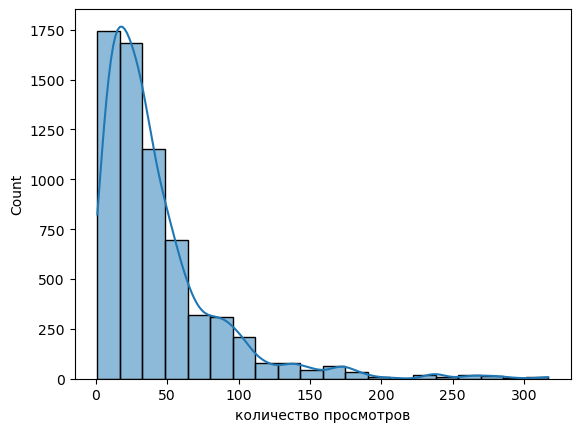

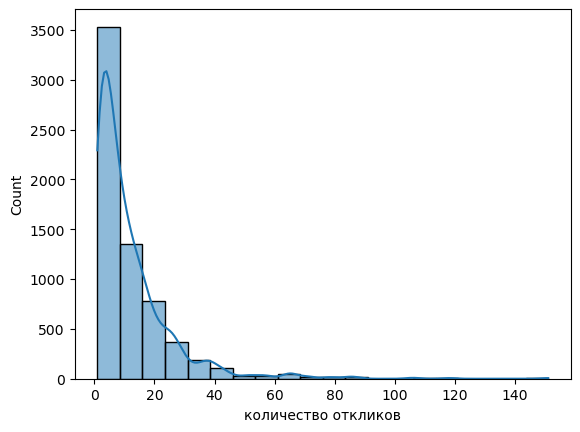

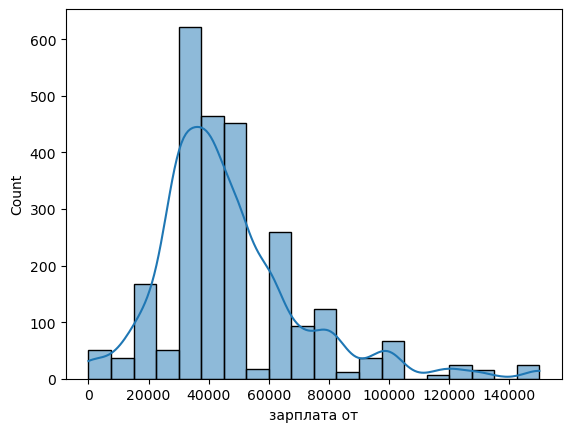

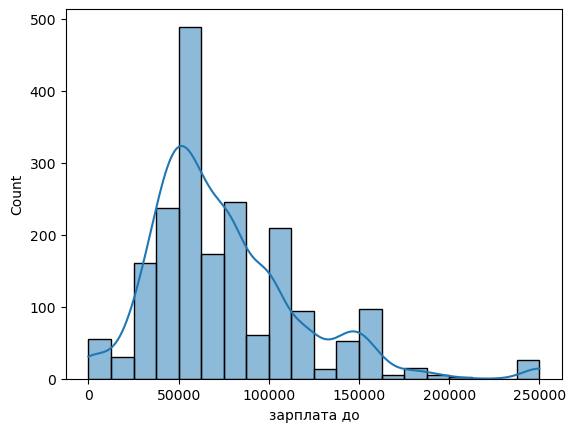

In [40]:
sns.histplot(df['количество просмотров'], bins=20, kde=True)
plt.show()

sns.histplot(df['количество откликов'], bins=20, kde=True)
plt.show()

sns.histplot(df['зарплата от'], bins=20, kde=True)
plt.show()

sns.histplot(df['зарплата до'], bins=20, kde=True)
plt.show()


Корреляция между числовыми признаками

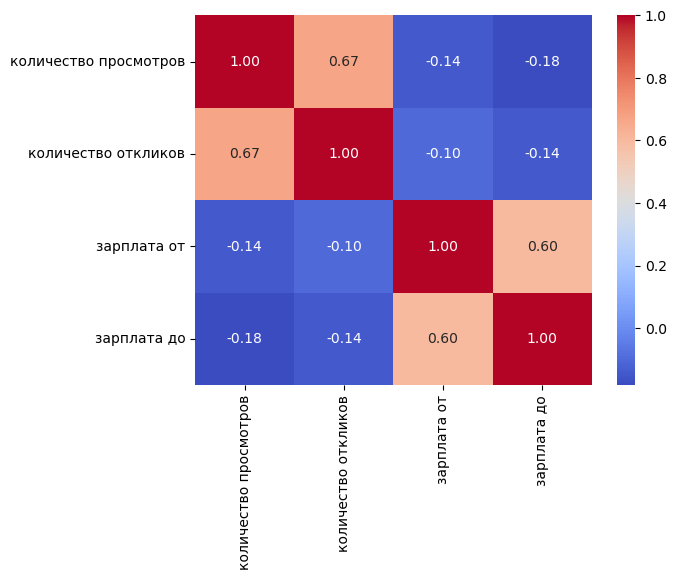

In [41]:
correlation_matrix = df[['количество просмотров', 'количество откликов', 'зарплата от', 'зарплата до']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Корреляция коэффициента 0.67 между количеством откликов и количеством просмотров свидетельствует о средней положительной связи между этими двумя переменными. Это означает, что, в общем, вакансии с более высоким количеством просмотров также имеют тенденцию привлекать больше откликов.

Возможные выводы:

- Популярность вакансии: Если вакансия привлекла больше внимания и получила много просмотров, это может быть связано с её привлекательностью или актуальностью для кандидатов.

- Эффективность размещения: Вакансии, которые успешно привлекают внимание (просмотры), также имеют более высокий отклик. Это может указывать на эффективность каналов размещения вакансий или использование эффективных ключевых слов в описании.

- Планирование рекрутинговой кампании: Понимание корреляции между просмотрами и откликами может помочь компаниям лучше планировать и анализировать эффективность своих рекрутинговых кампаний.

Однако важно помнить, что корреляция не обязательно означает причинно-следственную связь. Таким образом, необходимо учитывать другие факторы, которые могут влиять на отклики на вакансии.

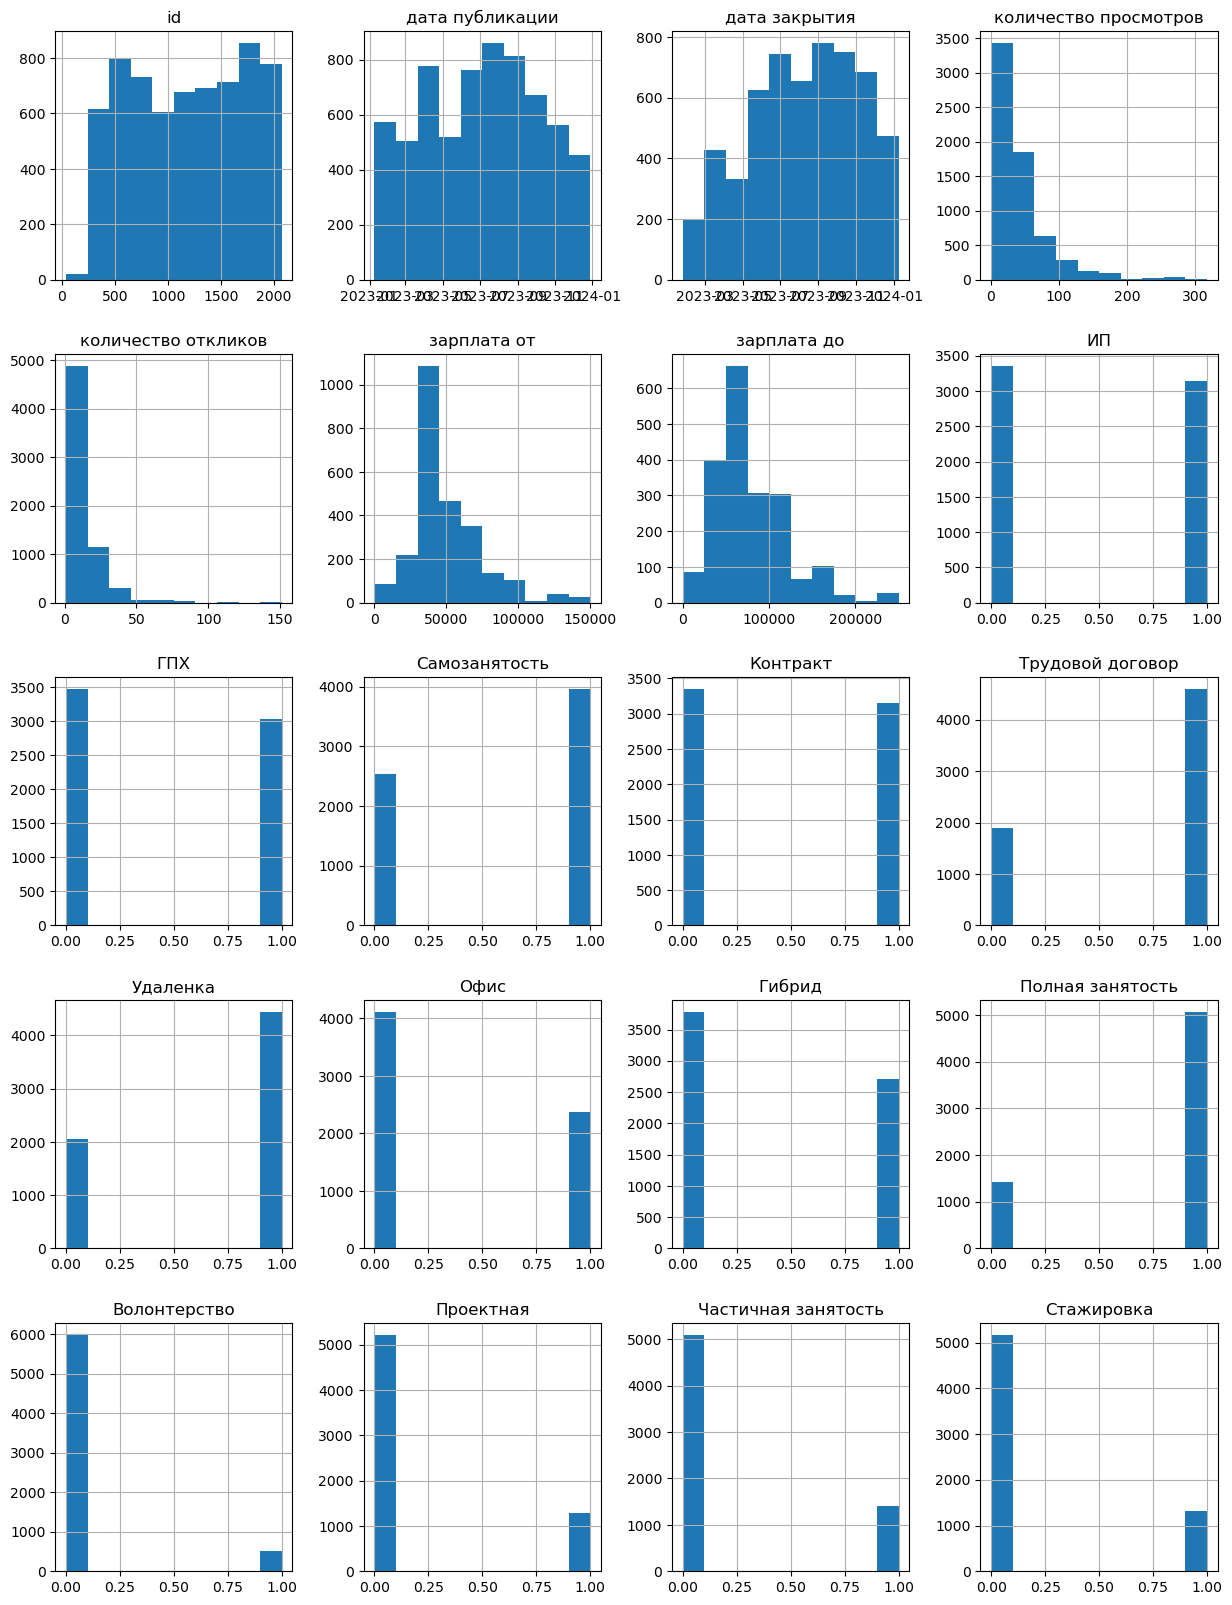

In [42]:
df.hist(figsize=(15, 20))
plt.show()

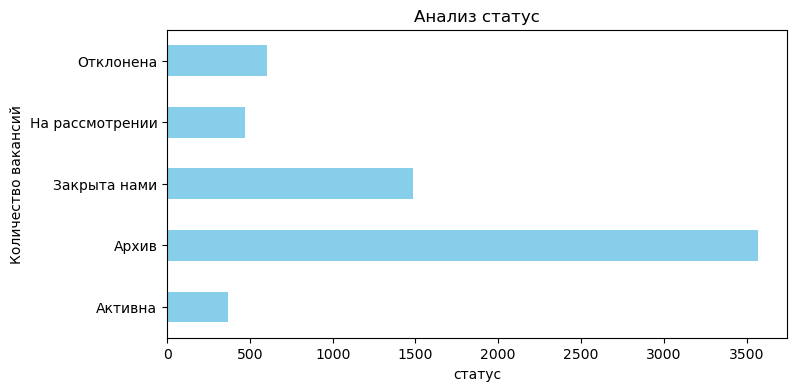

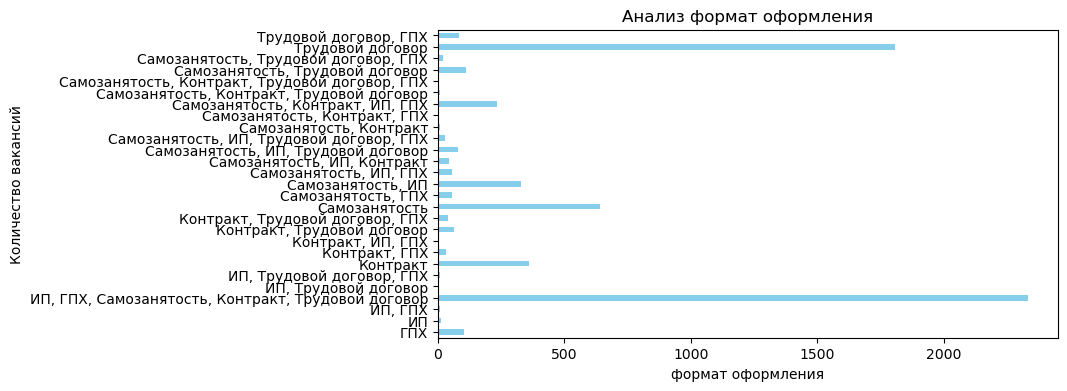

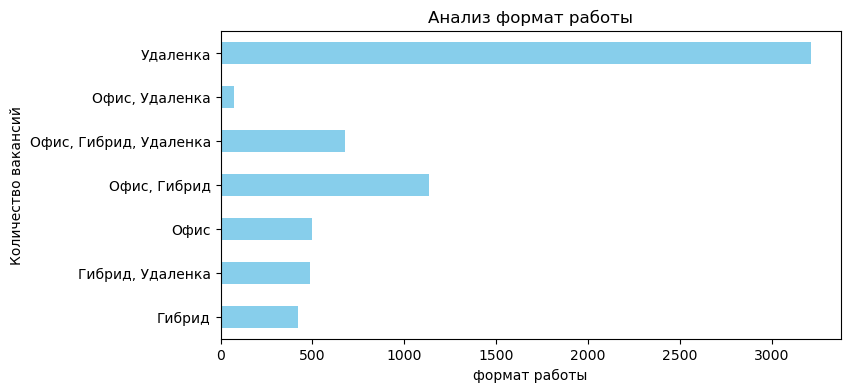

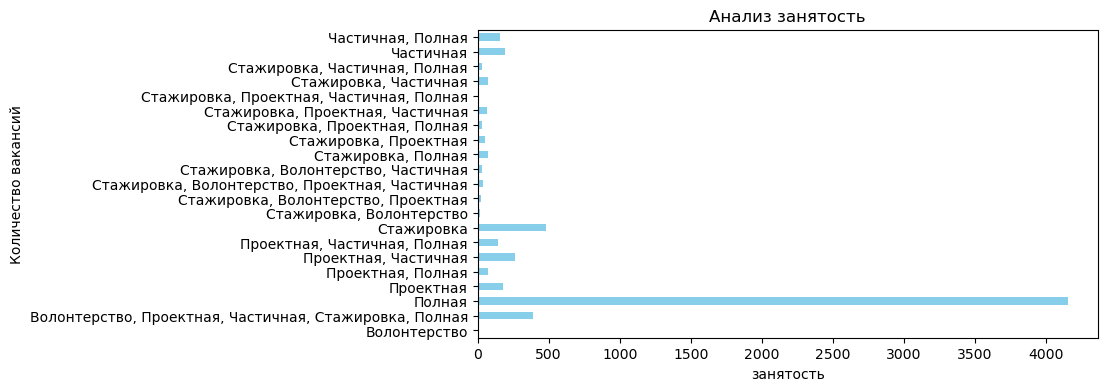

In [43]:
# Список категориальных признаков для анализа
categorical_features = ['статус', 'формат оформления', 'формат работы', 'занятость']

# Итерация по каждому признаку и создание отдельного графика
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    grouped_feature = df.groupby(feature).size()
    grouped_feature.plot(kind='barh', color='skyblue')
    plt.title(f'Анализ {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество вакансий')
    plt.show()

Выводы 

- зарплата в основном около 40 000 р 

- самозанятость и трудовой договор 

- удаленная работа и полная занятость 


    Хорошие аспекты:


Статус вакансий:

- Большинство вакансий имеют статус "Архив" или "Закрыта нами", что указывает на успешное закрытие вакансий.

- Небольшое количество вакансий имеют статус "Отклонена" или "На рассмотрении", что говорит о том, что не все вакансии закрываются успешно, но их доля невелика.



Источник лида:

- Повторные вакансии являются наиболее популярным источником лида, что может свидетельствовать о долгосрочных отношениях с заказчиками и повторных запросах на поиск кандидатов.

- Сорсинг и входящие заявки также вносят свой вклад, что говорит о разнообразии источников.



Менеджер:

- Есть несколько менеджеров с высокой активностью, особенно "менеджер 9".

- Присутствует разнообразие менеджеров, что может свидетельствовать о широкой клиентской базе.


Позиция:

- Присутствуют различные позиции, включая Project Manager, Интернет-маркетолог, Аналитик данных и другие, что указывает на разнообразие предлагаемых вакансий.

- Наличие позиций с разным уровнем сложности и ответственности также хорошо.



Город:

- Основное количество вакансий предложено в Москве, что ожидаемо.
- Присутствуют вакансии в различных городах, что может привлечь кандидатов из разных регионов.



Формат оформления:

- ИП, ГПХ, Самозанятость, Контракт и Трудовой договор - разнообразие форматов предоставления услуг заказчикам, что может соответствовать разным потребностям.


Формат работы:

- Удаленная работа предоставляется в большинстве вакансий, что может быть привлекательным для кандидатов, особенно в современных условиях.



       Плохие аспекты:


Формат оформления:

Встречаются случаи, когда формат оформления не указан (NaN). Это может затруднить процесс закрытия вакансии и взаимодействия с заказчиком.


Формат работы:

Небольшое количество вакансий предлагают только офисную работу. Современные кандидаты, возможно, предпочитают более гибкие варианты.


Занятость:

Встречаются случаи, когда формат занятости не указан (NaN). Это может создать неопределенность для кандидатов.


Образование:

Встречаются случаи, когда формат образования не указан (NaN). Это может затруднить подбор кандидатов с необходимыми знаниями и навыками.


Ссылка на тестовое:

Большинство вакансий не предоставляют ссылку на тестовое задание. Это может затруднить оценку кандидатов и увеличить время на закрытие вакансий.


Опыт:

Встречаются случаи, когда опыт не указан явно (например, "возможен опыт в pet-проектах"). Это может создать неопределенность в требованиях к кандидатам.


Общий вывод: 

В компании есть хорошие практики, такие как разнообразие вакансий и клиентов, предоставление удаленных возможностей, но есть и аспекты, которые могут быть улучшены, такие как ясность в требованиях и форматировании вакансий.



# Анализ успешно закрытых вакансий

In [44]:
closed_vacancies = df[df['статус'].isin(['Закрыта нами'])]
closed_vacancies

,id,статус,источник лида,менеджер,дата публикации,дата закрытия,количество просмотров,количество откликов,позиция,зарплата от,...,Особые навыки,Английский язык,Самостоятельность и организованность,Веб-разработка,Мобильная разработка,Аналитические навыки,Управление продуктом,additional_requirements_category,сегменты,сегменты_условий
22,281,Закрыта нами,NaN,менеджер 9,2023-01-09,2023-01-24,29,6,Фронтенд разработчик на проект,NaN,...,False,False,False,False,False,False,False,Другое,1. Скрининг портфолио,- Испытательный срок — 2 месяца.
23,281,Закрыта нами,NaN,менеджер 9,2023-01-09,2023-01-24,29,6,Фронтенд разработчик на проект,NaN,...,False,False,False,False,False,False,False,Другое,x000D,- Доступно соискателям с инвалидностью.
24,281,Закрыта нами,NaN,менеджер 9,2023-01-09,2023-01-24,29,6,Фронтенд разработчик на проект,NaN,...,False,False,False,False,False,False,False,Другое,2. Собеседование с руководителем направления и hr,"- Работа удаленная, оплата в форме оклада."
25,281,Закрыта нами,NaN,менеджер 9,2023-01-09,2023-01-24,29,6,Фронтенд разработчик на проект,NaN,...,False,False,False,False,False,False,False,Другое,менеджером,"- График гибкий, с удобным для Вас временем на..."
88,297,Закрыта нами,Повторная,менеджер 3,2023-01-13,2023-01-30,19,6,Junior Python разработчик,NaN,...,False,False,False,False,False,False,False,Программирование,1. Скрининг,- Профессиональное обучение и сертификацию за ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6353,2041,Закрыта нами,Сорсинг,менеджер 9,2023-12-13,2023-12-25,47,1,JavaScript-разработчик (TypeScript),NaN,...,False,False,False,True,False,False,False,Другое,x000D,- создание самого мощного и нужного сервиса дл...
6354,2041,Закрыта нами,Сорсинг,менеджер 9,2023-12-13,2023-12-25,47,1,JavaScript-разработчик (TypeScript),NaN,...,False,False,False,True,False,False,False,Другое,x000D,- получение большого количества приятных отзыв...
6355,2041,Закрыта нами,Сорсинг,менеджер 9,2023-12-13,2023-12-25,47,1,JavaScript-разработчик (TypeScript),NaN,...,False,False,False,True,False,False,False,Другое,2. Техническое интервью,- карьерный рост вместе с компанией;_x000D_
6356,2041,Закрыта нами,Сорсинг,менеджер 9,2023-12-13,2023-12-25,47,1,JavaScript-разработчик (TypeScript),NaN,...,False,False,False,True,False,False,False,Другое,x000D,- гибкий отпуск_x000D_


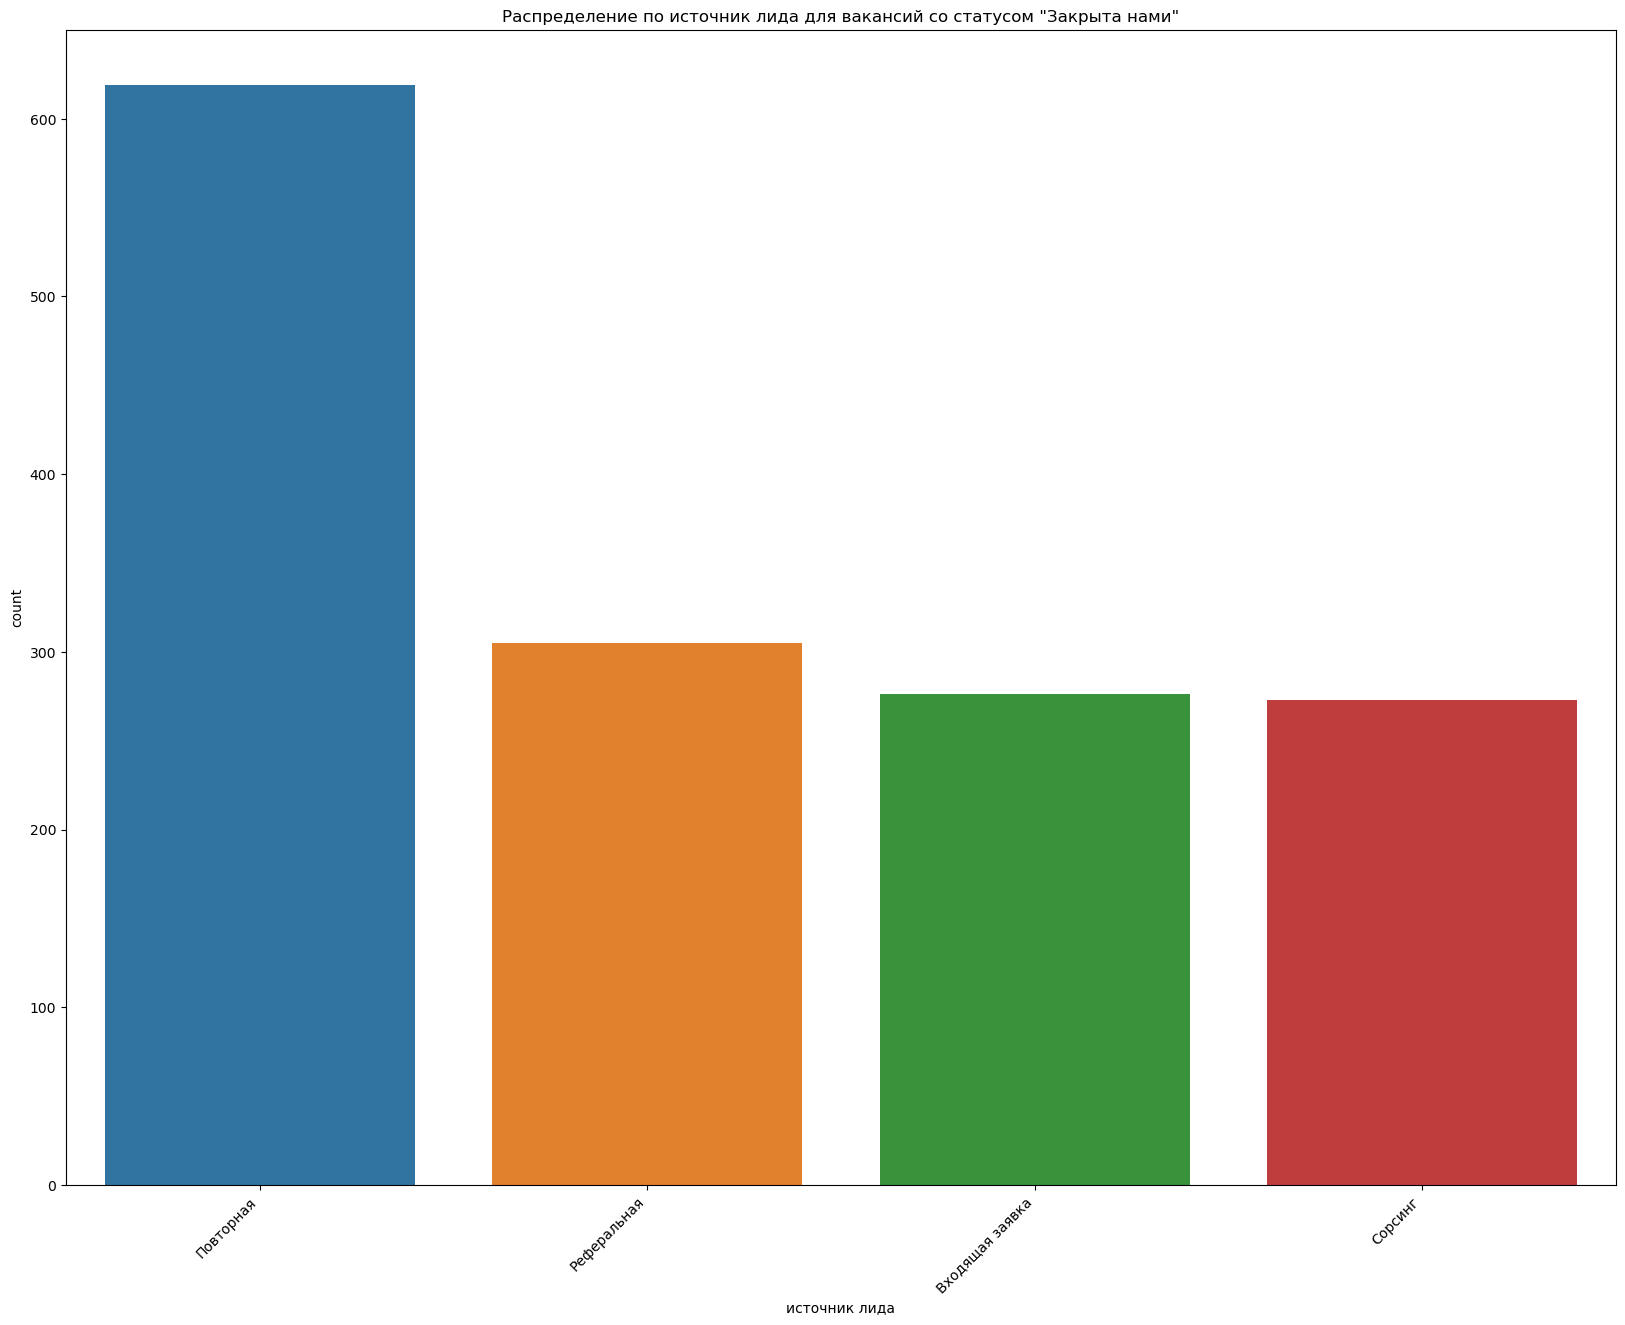

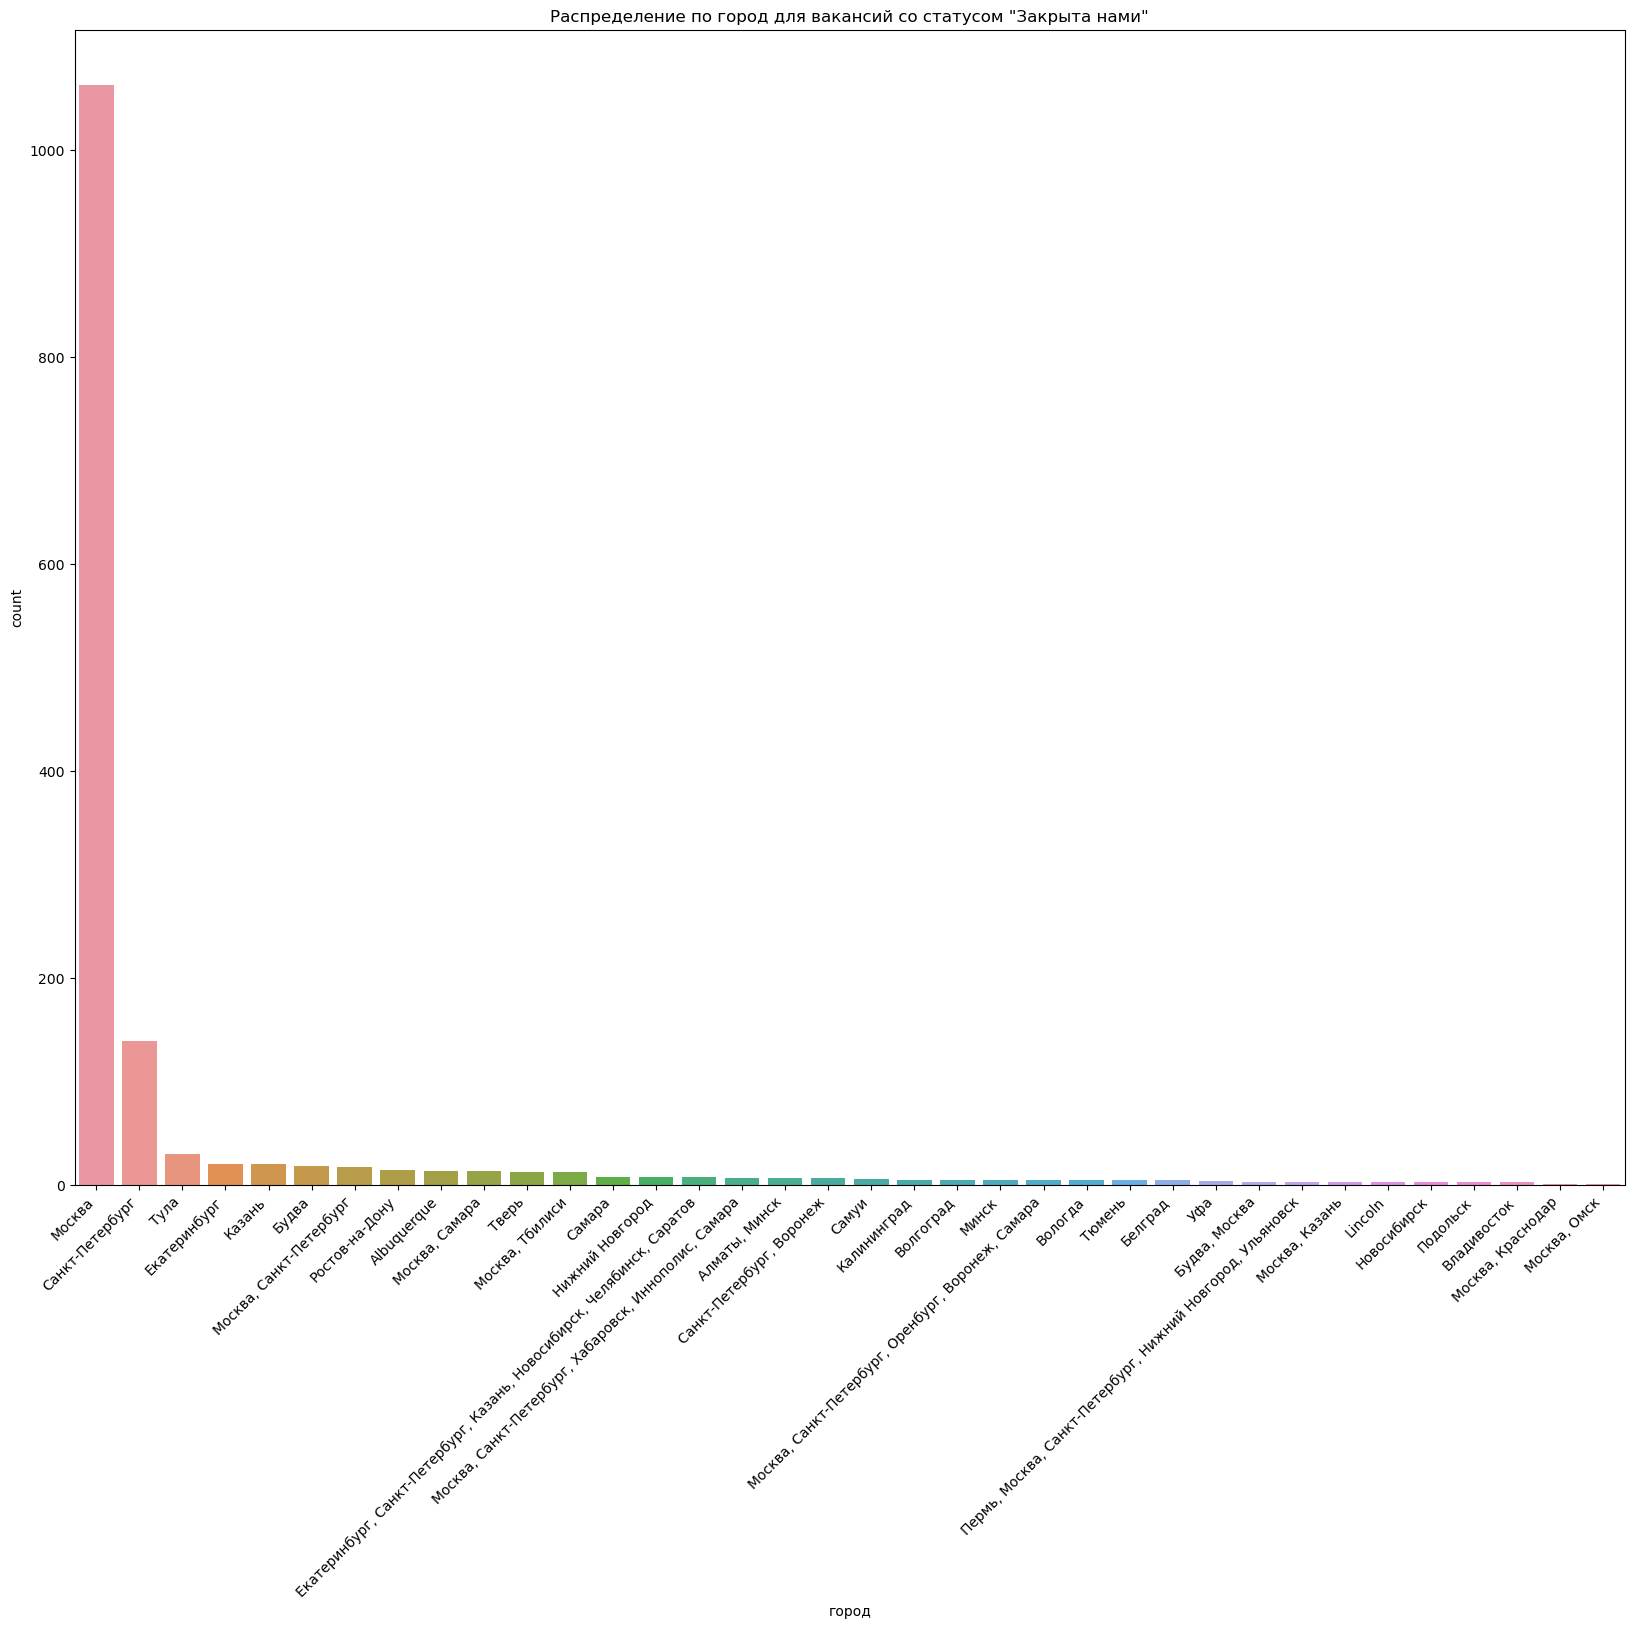

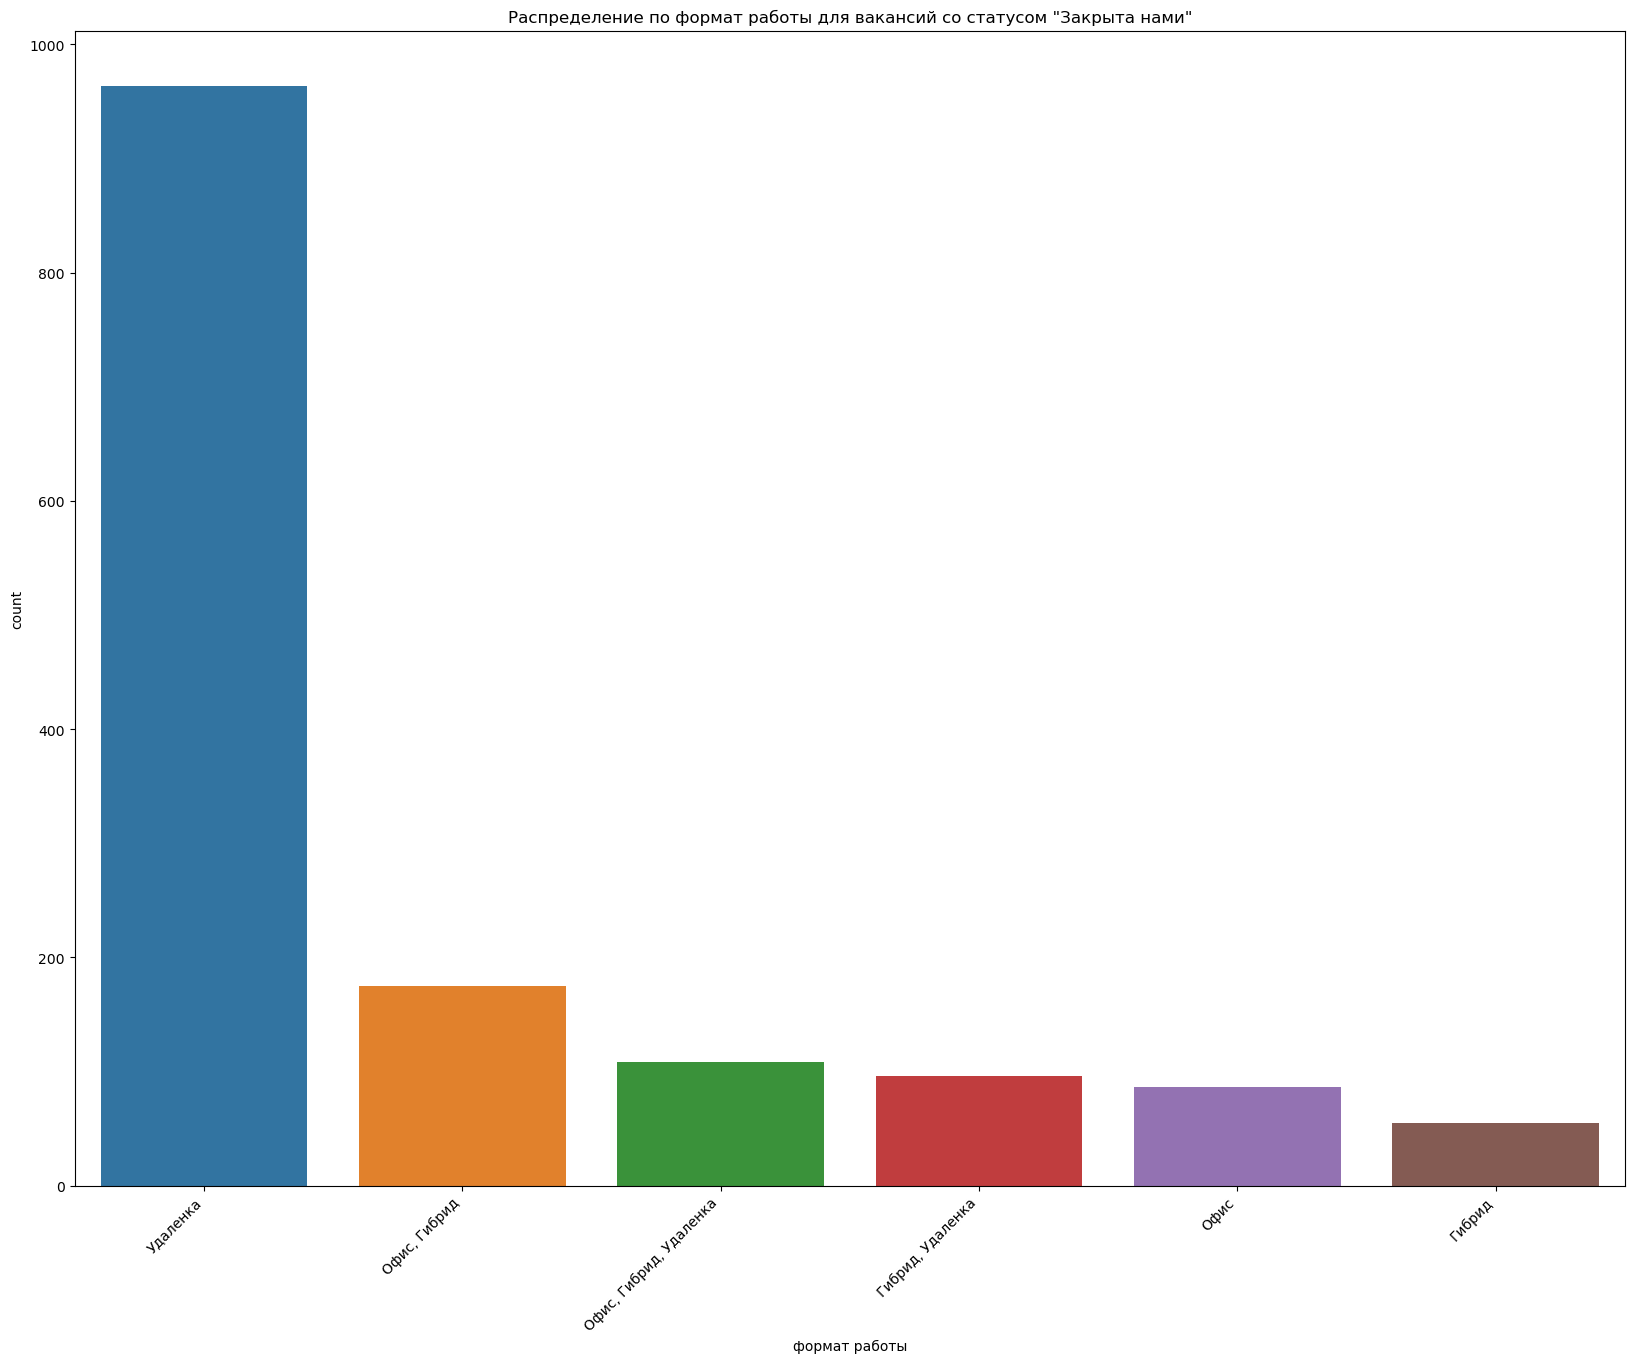

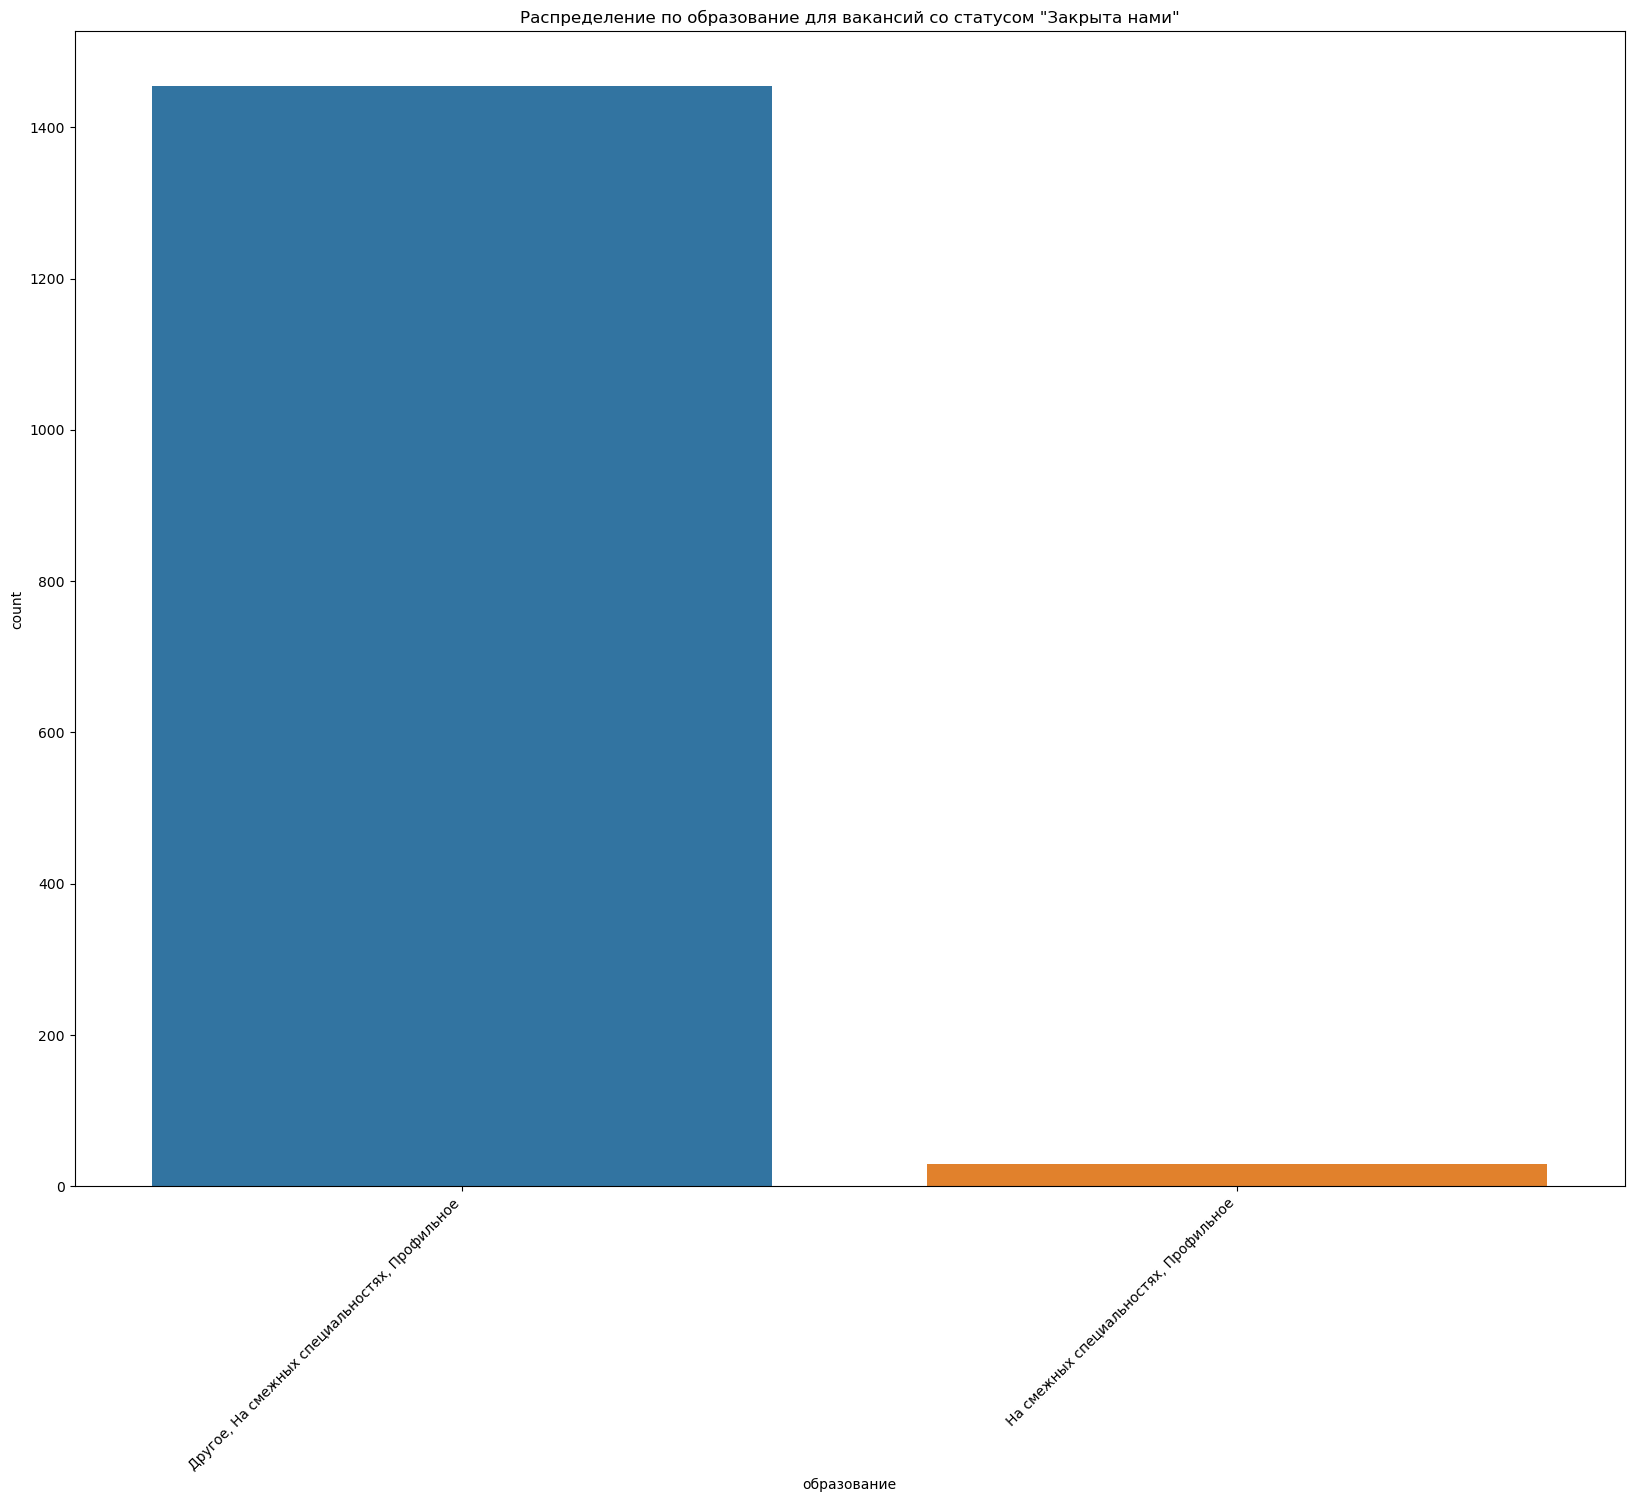

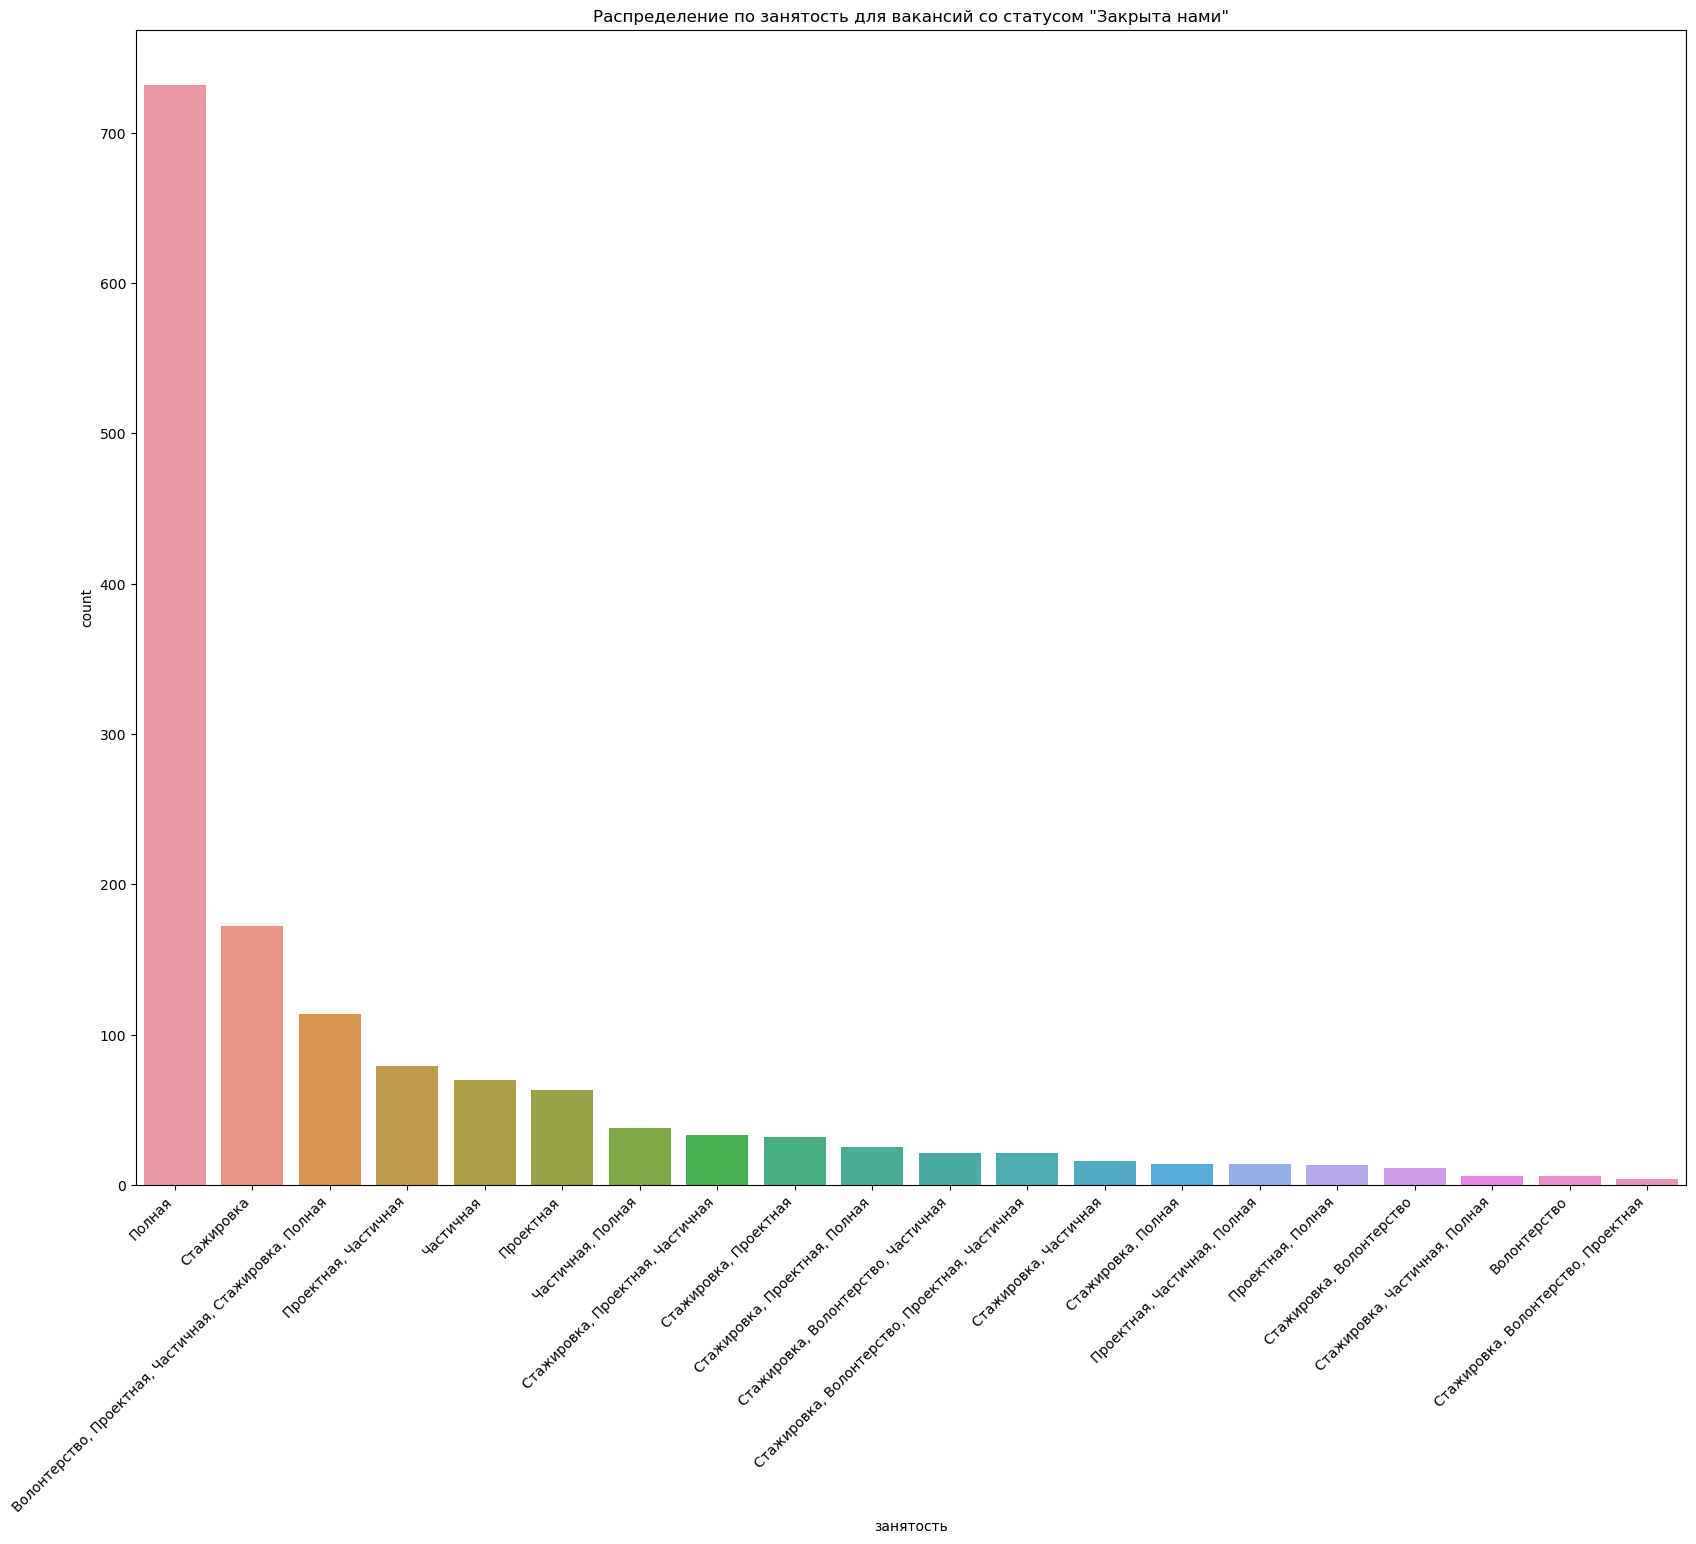

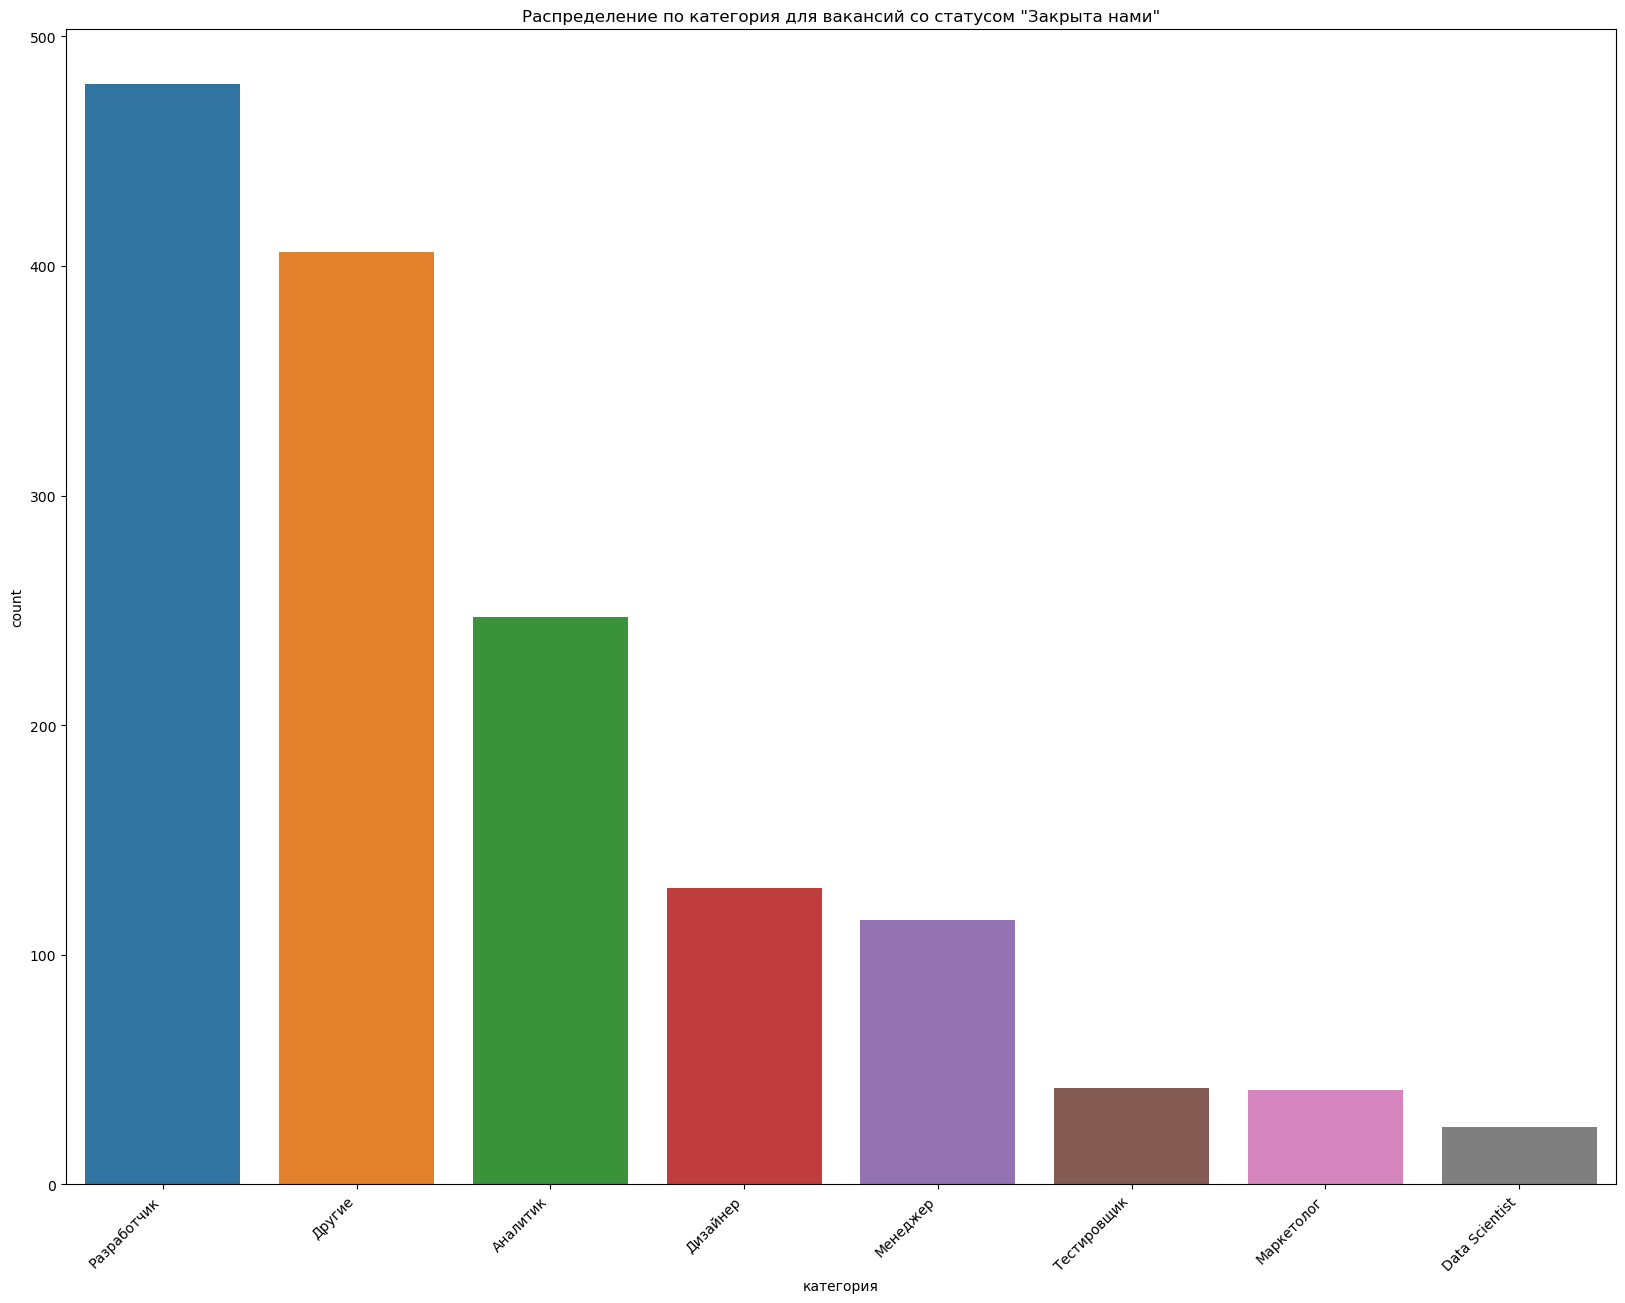

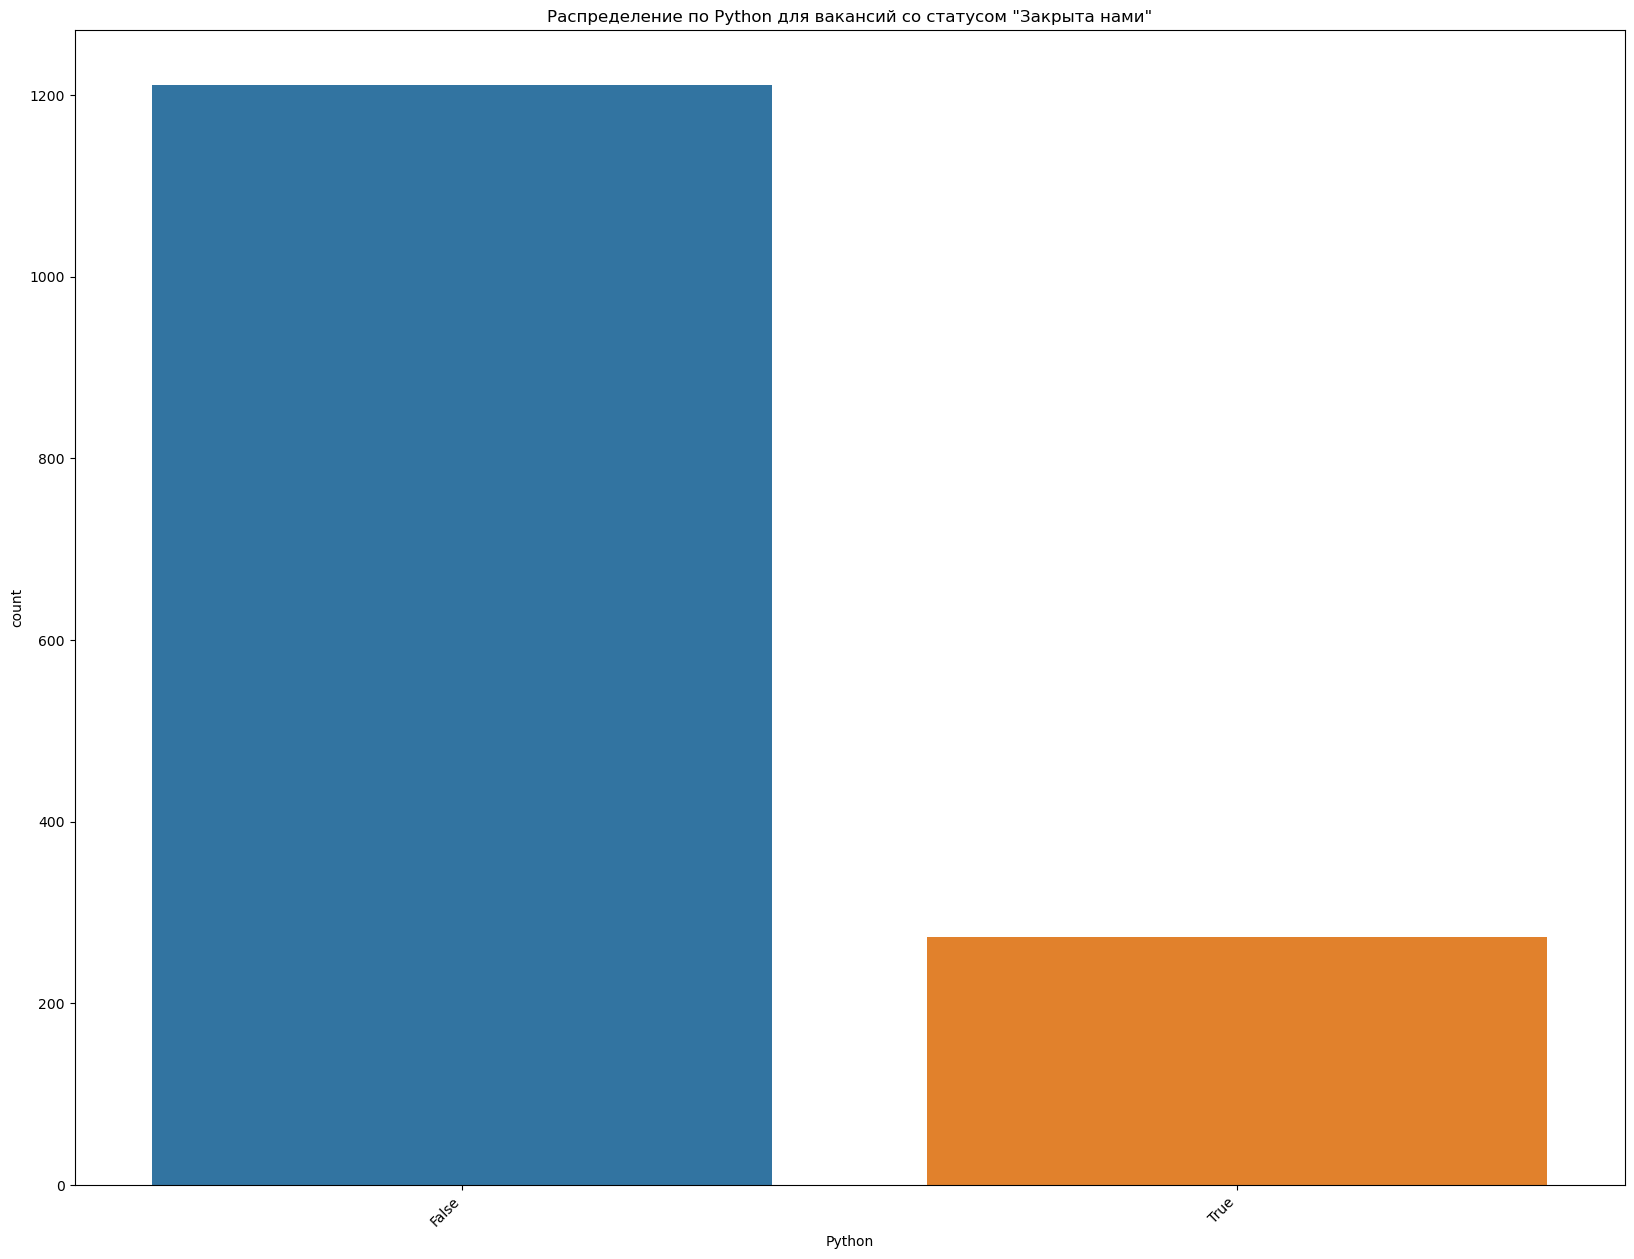

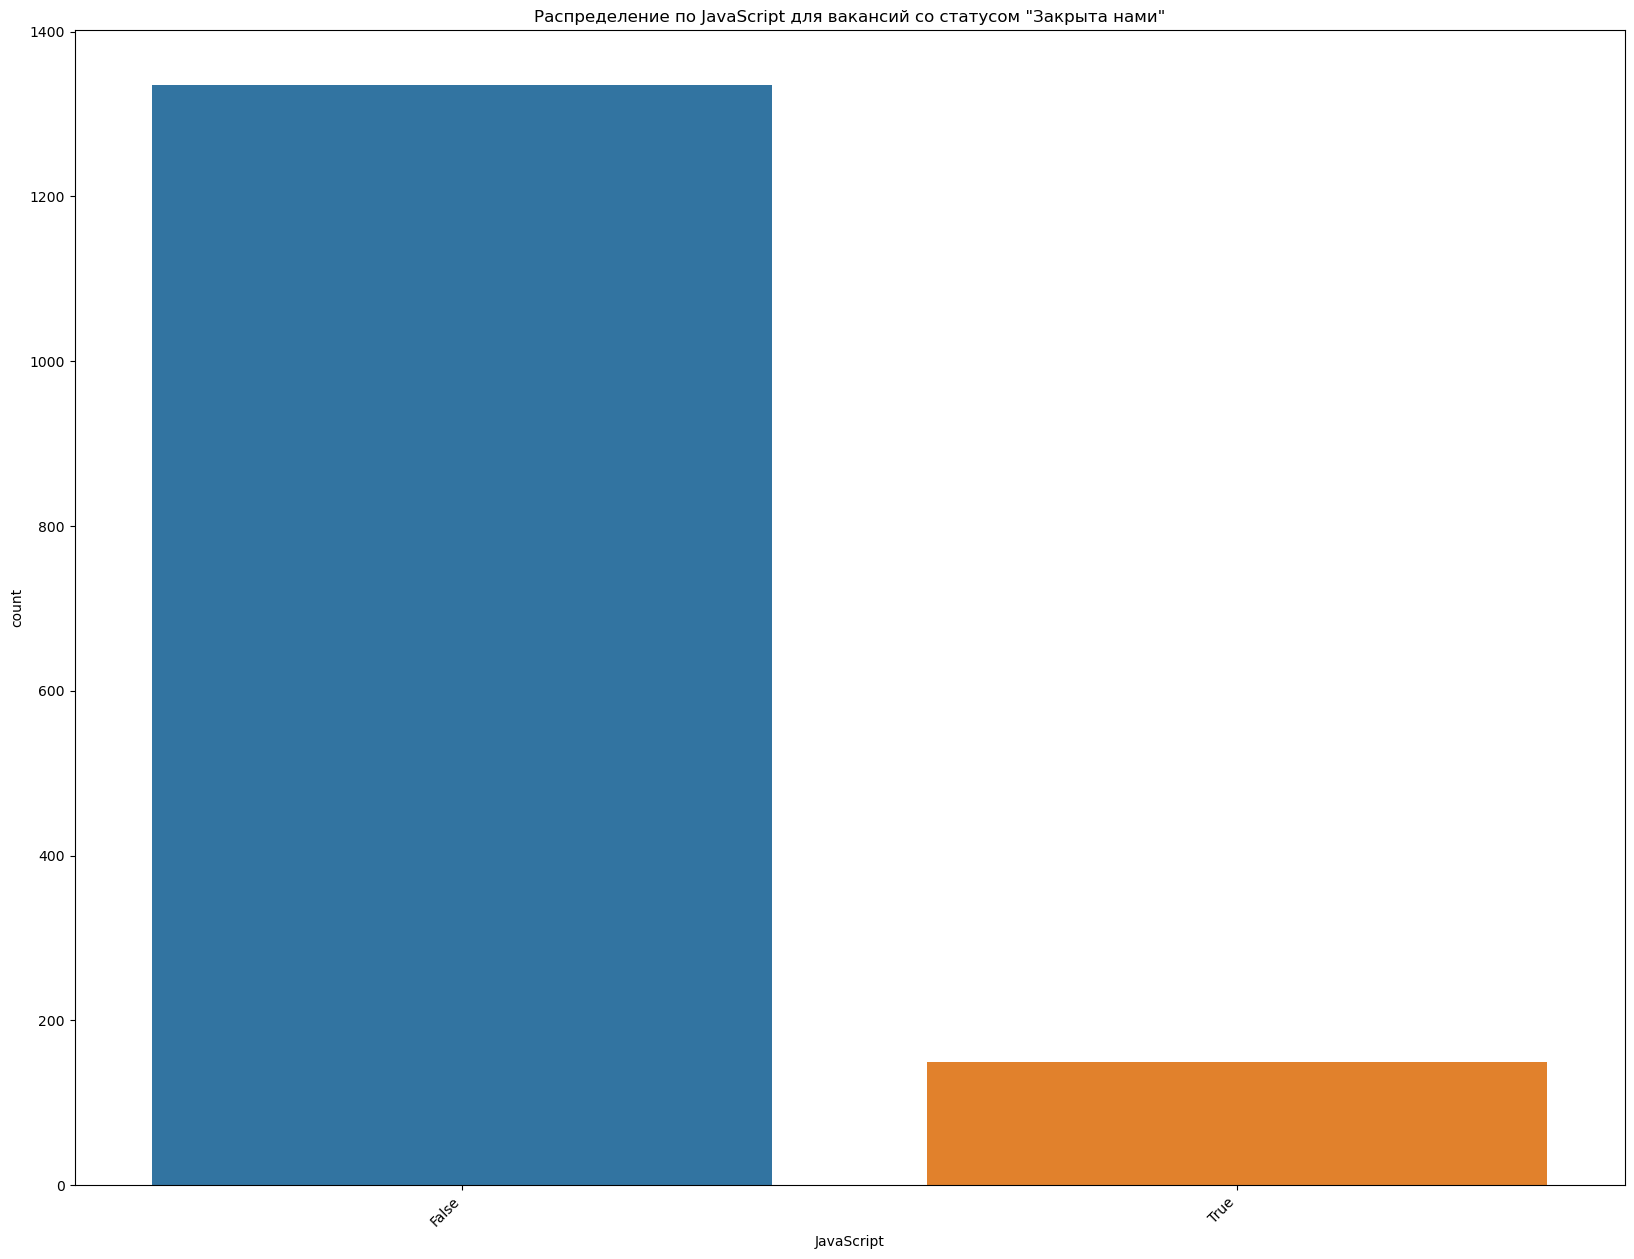

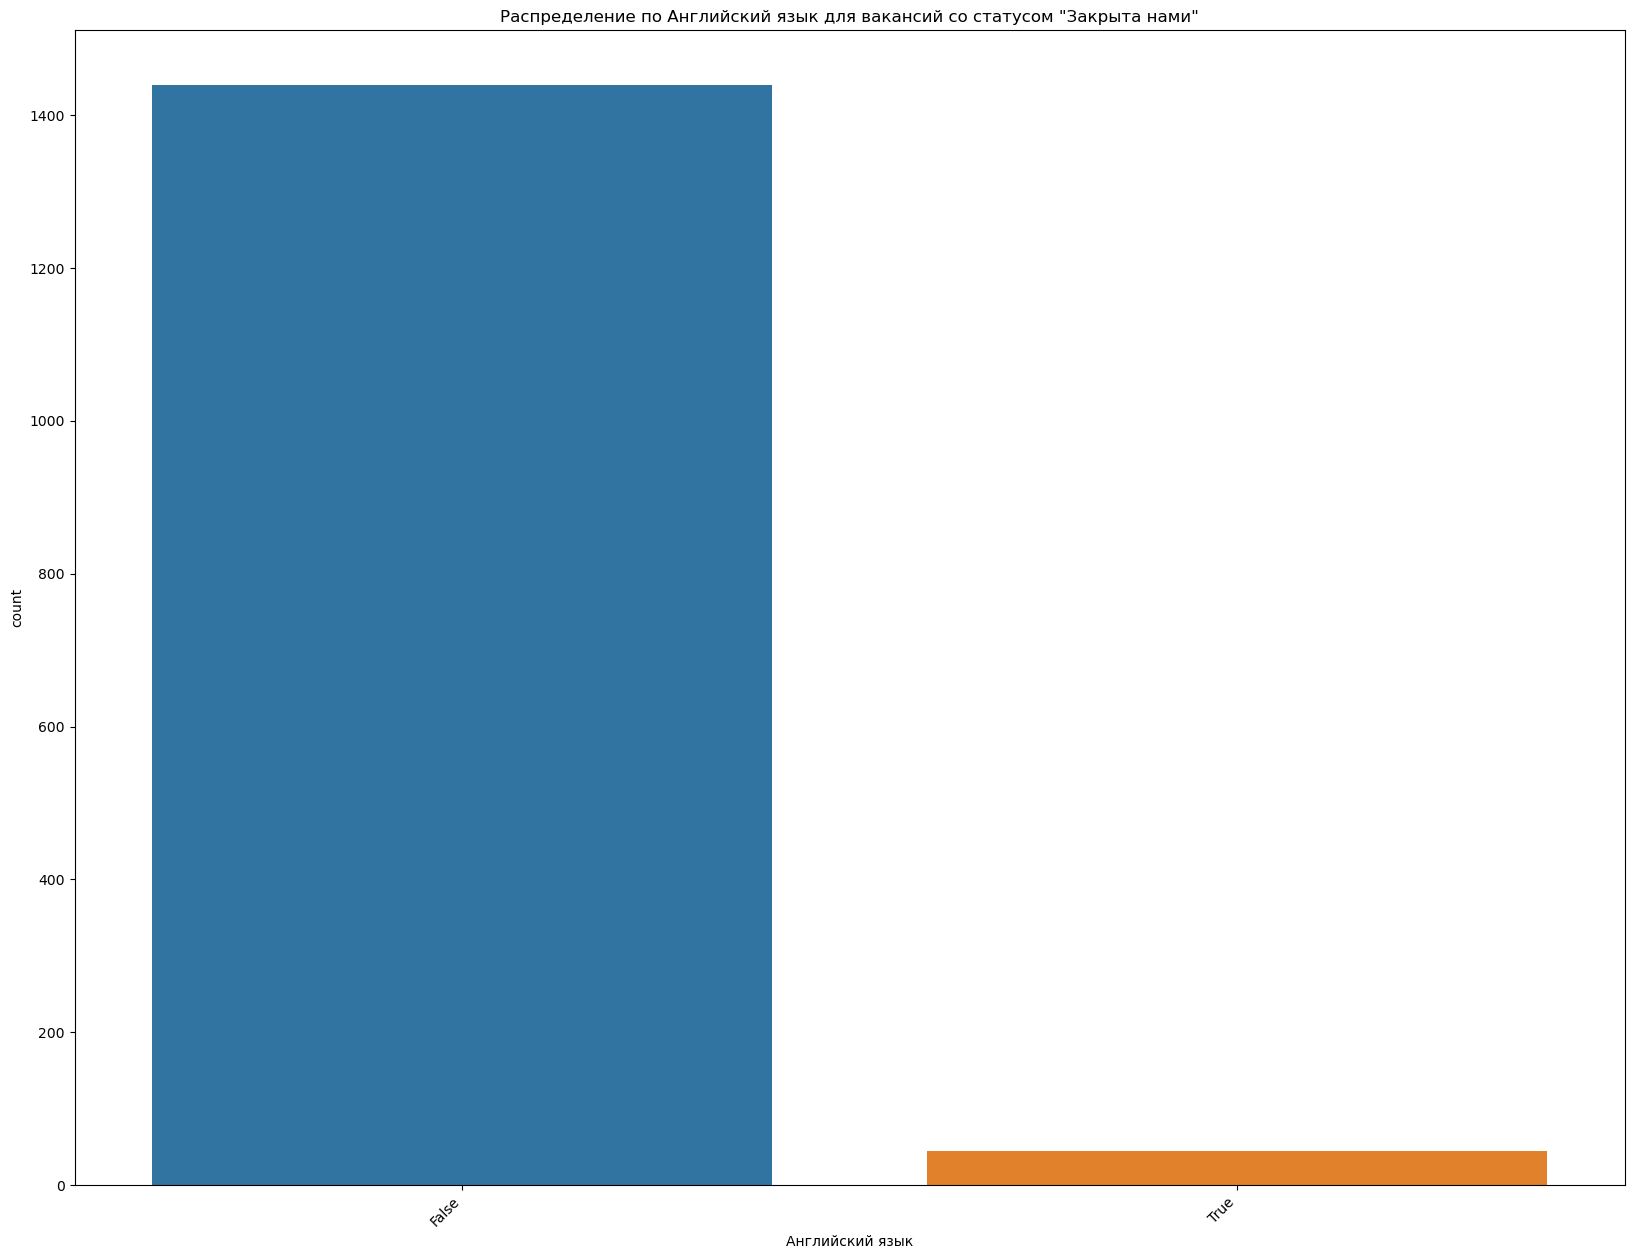

In [45]:
# Выберем только те строки, где статус "Закрыта нами"
closed_by_us = df[df['статус'] == 'Закрыта нами']

# Посмотрим на наиболее часто встречающиеся значения в определенных столбцах
selected_columns = ['источник лида', 'город', 'формат работы', 'образование', 'занятость', 'категория', 'Python', 'JavaScript', 'Английский язык']
for column in selected_columns:
    plt.figure(figsize=(20, 15))
    sns.countplot(x=column, data=closed_by_us, order=closed_by_us[column].value_counts().index)
    plt.title(f'Распределение по {column} для вакансий со статусом "Закрыта нами"')
    plt.xticks(rotation=45, ha='right')
    plt.show()

Выводы по вакансиям со статусом 'закрыта нами'

- Источник Лида: Повторная заявка является наиболее успешным источником.

- Город: В основном, успешно закрытые вакансии находятся в Москве.

- Формат работы:Удаленный формат работы более популярен для успешно закрытых вакансий.

- Образование: Образование "Другое, на смежных специальностях" и "Профильное" преобладает среди успешно закрытых вакансий.

- Занятость:Полная занятость является основным форматом занятости для успешно закрытых вакансий.

- Позиция:Вакансии, связанные с разработкой, вероятно, имеют больший успех.

- Знание английского языка: Вакансии, для которых не требуется знание английского языка, также успешно закрываются.

In [46]:
closed_vacancies.describe().round(1)

,id,количество просмотров,количество откликов,зарплата от,зарплата до,ИП,ГПХ,Самозанятость,Контракт,Трудовой договор,Удаленка,Офис,Гибрид,Полная занятость,Волонтерство,Проектная,Частичная занятость,Стажировка
count,1484.0,1484.0,1484.0,503.0,430.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0,1484.0
mean,1210.1,53.7,16.8,40334.2,72689.6,0.5,0.5,0.7,0.5,0.6,0.8,0.2,0.3,0.6,0.1,0.3,0.3,0.3
std,507.7,40.8,16.8,18223.0,44707.8,0.5,0.5,0.5,0.5,0.5,0.4,0.4,0.5,0.5,0.3,0.4,0.4,0.5
min,281.0,2.0,1.0,700.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,764.5,26.0,6.0,30000.0,40000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,1286.0,44.0,12.0,40000.0,65000.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,1669.0,69.0,22.0,50000.0,90000.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0
max,2041.0,295.0,106.0,100000.0,250000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Из статистики успешно закрытых вакансий можно сделать следующие наблюдения:

Количество просмотров и откликов:
- Среднее количество просмотров успешно закрытых вакансий чуть выше (1210.1) по сравнению с общей статистикой (1168.1).
- Среднее количество откликов также выше для успешно закрытых вакансий (53.7 против 40.2).

Зарплатные ожидания:
- Средняя зарплата "от" на успешно закрытых вакансиях составляет примерно 40334.2, что немного ниже средней зарплаты "от" по общей статистике (47064.7).
- Средняя зарплата "до" также ниже для успешно закрытых вакансий (72689.6) по сравнению с общей статистикой (74808.9).

Другие признаки:
- По другим признакам (ИП, ГПХ, Самозанятость, Контракт, Трудовой договор, Удаленка, Офис, Гибрид, Полная занятость, Волонтерство, Проектная, Частичная занятость, Стажировка) преимущественно наблюдается высокий процент встречаемости, близкий к 1.0, что может указывать на популярность этих опций для успешно закрытых вакансий.

Общий вывод: Успешно закрытые вакансии, в среднем, имеют больше просмотров и откликов, а зарплатные ожидания чуть ниже, чем у общей статистики. Также можно отметить, что некоторые опции, такие как удаленная работа, полная занятость и т.д., являются популярными для успешно закрытых вакансий.

Распределение данных

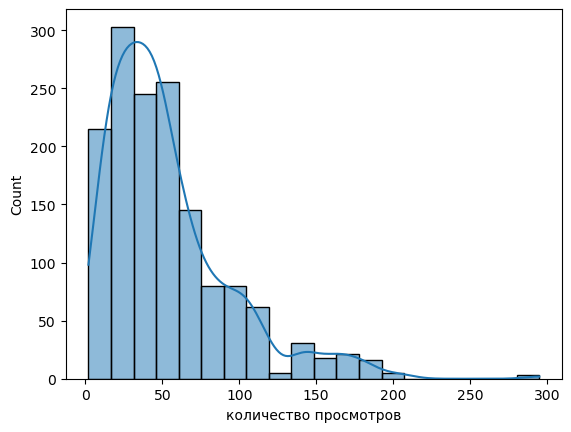

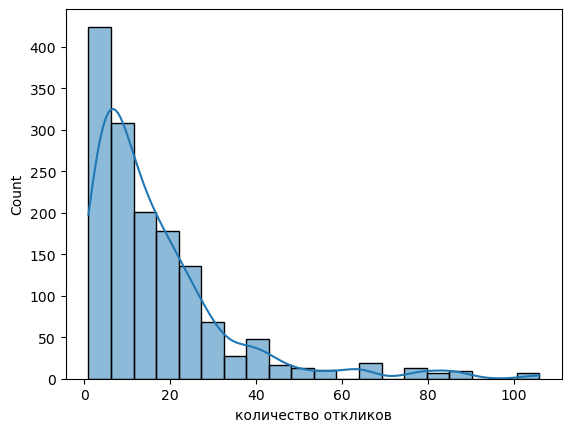

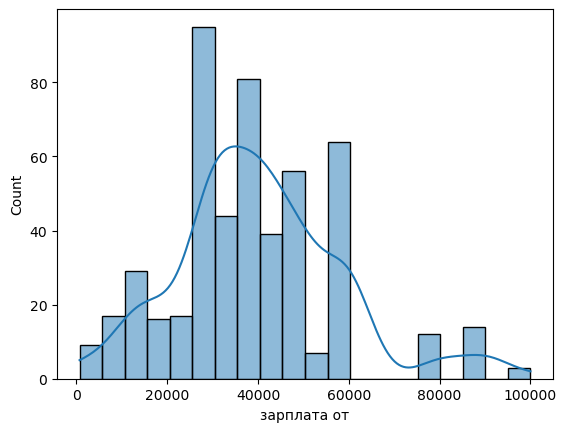

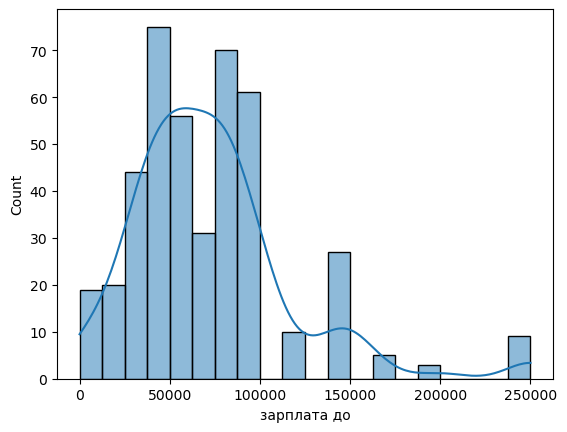

In [47]:
sns.histplot(closed_vacancies['количество просмотров'], bins=20, kde=True)
plt.show()

sns.histplot(closed_vacancies['количество откликов'], bins=20, kde=True)
plt.show()

sns.histplot(closed_vacancies['зарплата от'], bins=20, kde=True)
plt.show()

sns.histplot(closed_vacancies['зарплата до'], bins=20, kde=True)
plt.show()

Корреляция между числовыми признаками:

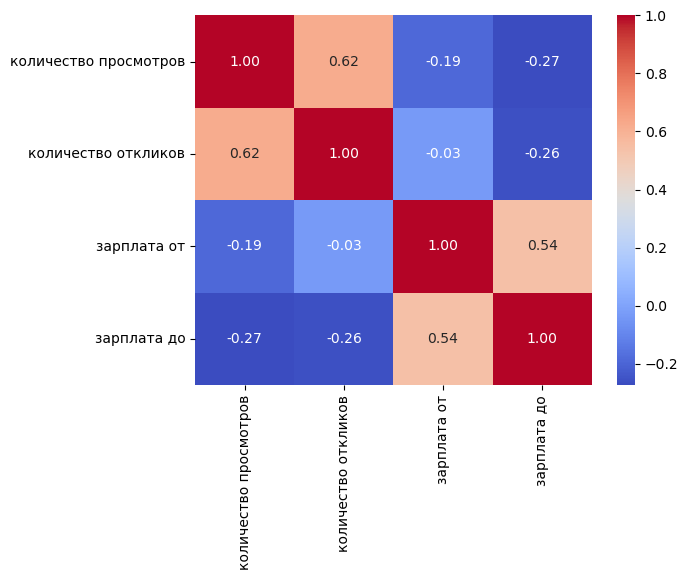

In [48]:
correlation_matrix_closed = closed_vacancies[['количество просмотров', 'количество откликов', 'зарплата от', 'зарплата до']].corr()
sns.heatmap(correlation_matrix_closed, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

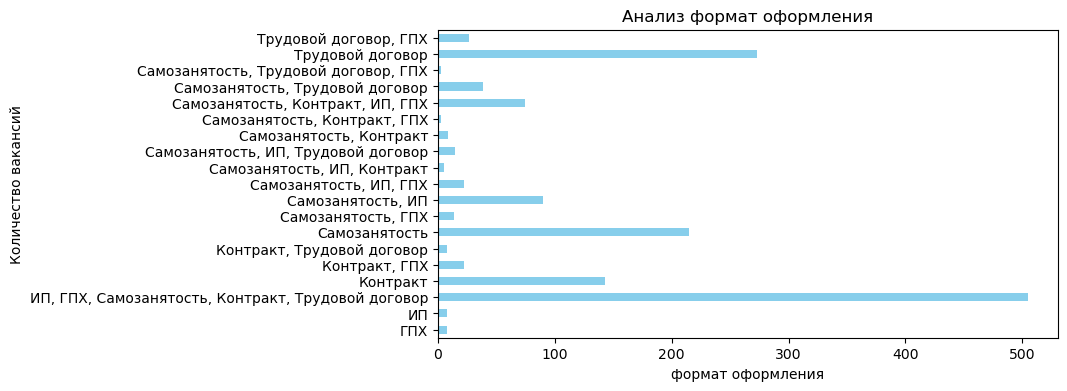

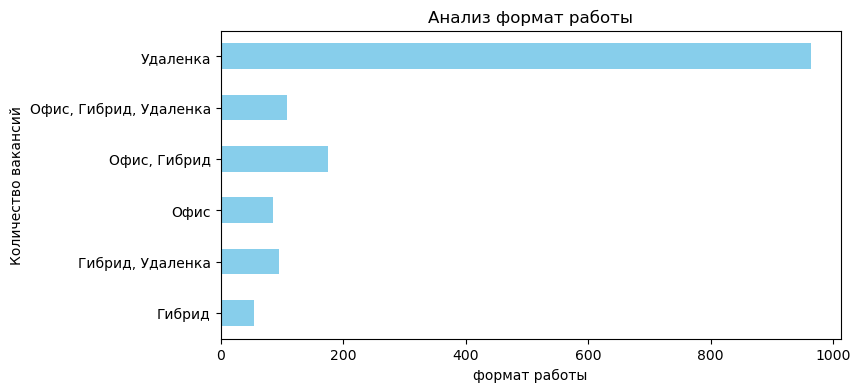

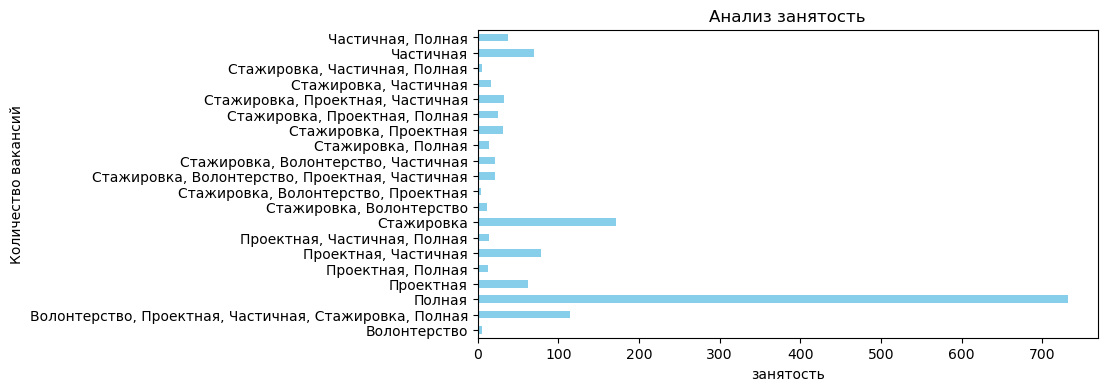

In [49]:
# Список категориальных признаков для анализа
categorical_features = ['формат оформления', 'формат работы', 'занятость']

# Итерация по каждому признаку и создание отдельного графика
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    grouped_feature = closed_vacancies.groupby(feature).size()
    grouped_feature.plot(kind='barh', color='skyblue')
    plt.title(f'Анализ {feature}')
    plt.xlabel(feature)
    plt.ylabel('Количество вакансий')
    plt.show()

# Сравните статистики успешно закрытых вакансий с общими данными, чтобы выявить отличия

In [50]:
compare_statistics = pd.DataFrame({
    'Общие данные': df.describe().loc['mean'],
    'Успешно закрытые вакансии': closed_vacancies.describe().loc['mean']
})
print(compare_statistics)


                       Общие данные  Успешно закрытые вакансии
id                      1182.427010                1210.146900
количество просмотров     42.647367                  53.659030
количество откликов       11.952880                  16.783019
зарплата от            46907.083333               40334.194831
зарплата до            74835.552458               72689.639535
ИП                         0.483369                   0.485175
ГПХ                        0.465661                   0.457547
Самозанятость              0.610102                   0.670485
Контракт                   0.484293                   0.518868
Трудовой договор           0.707576                   0.586253
Удаленка                   0.684324                   0.787062
Офис                       0.366338                   0.248652
Гибрид                     0.417462                   0.292453
Полная занятость           0.780413                   0.644205
Волонтерство               0.077918                   0

- Количество просмотров и откликов:
Успешно закрытые вакансии имеют в среднем более высокие показатели как по просмотрам, так и по откликам.

- Зарплата:
Средняя нижняя граница зарплаты успешно закрытых вакансий немного ниже, чем у общих данных.
Верхняя граница зарплаты также немного ниже для успешно закрытых вакансий.

- Форматы оформления:
Успешно закрытые вакансии имеют близкие или чуть более высокие доли по ИП, Самозанятости, и Удаленке.
Форматы Контракт, Трудовой договор, и Офис встречаются примерно в одинаковых пропорциях.

- Форматы работы:
Удаленка и Полная занятость преобладают в обоих случаях.
Волонтерство и Стажировка также имеют более высокие доли в успешно закрытых вакансиях.

- Типы занятости:
Успешно закрытые вакансии чаще связаны с Полной занятостью, Проектной работой и Частичной занятостью.

- Офис и Гибрид:
Офисная занятость встречается реже в успешно закрытых вакансиях, чем в общих данных.
Гибридная форма работы также менее популярна.

- Специальные формы работы:
Проектная работа и Частичная занятость более характерны для успешно закрытых вакансий.

- Волонтерство и Стажировка:
Волонтерство и Стажировка более распространены в успешно закрытых вакансиях.

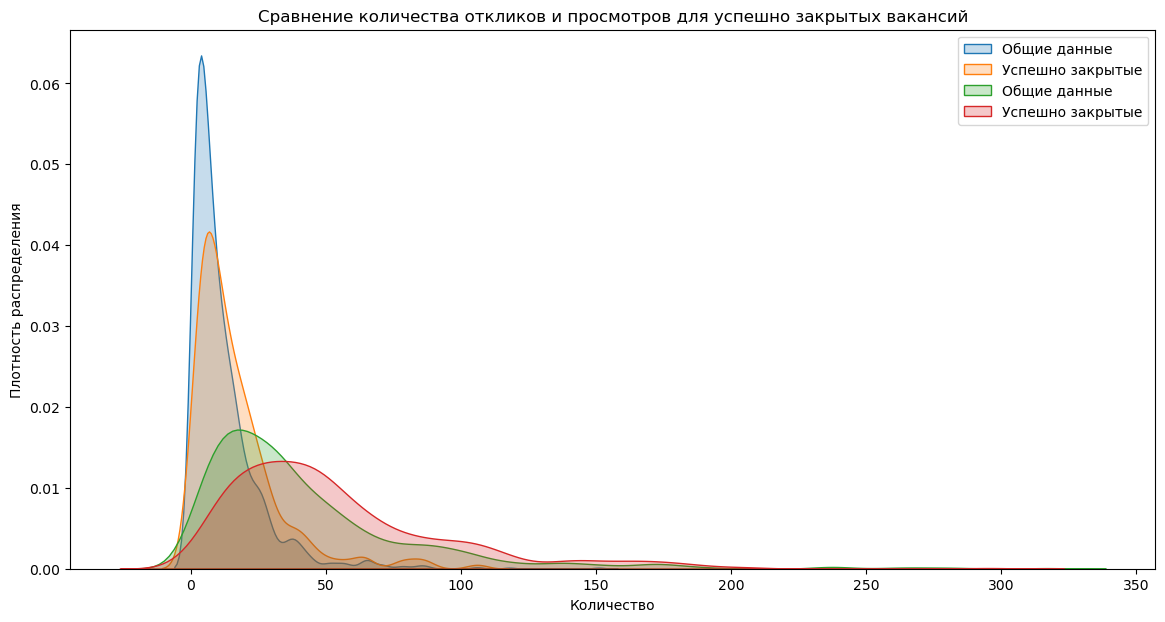

In [51]:
# Столбцы для анализа
columns_to_analyze = ['количество откликов', 'количество просмотров']

# Сравнение для успешно закрытых вакансий
closed_by_us_data = df[df['статус'] == 'Закрыта нами']

# Создание графика
plt.figure(figsize=(14, 7))
for column in columns_to_analyze:
    sns.kdeplot(df[column], label='Общие данные', fill=True)
    sns.kdeplot(closed_by_us_data[column], label='Успешно закрытые', fill=True)
    
plt.title('Сравнение количества откликов и просмотров для успешно закрытых вакансий')
plt.xlabel('Количество')
plt.ylabel('Плотность распределения')
plt.legend()
plt.show()

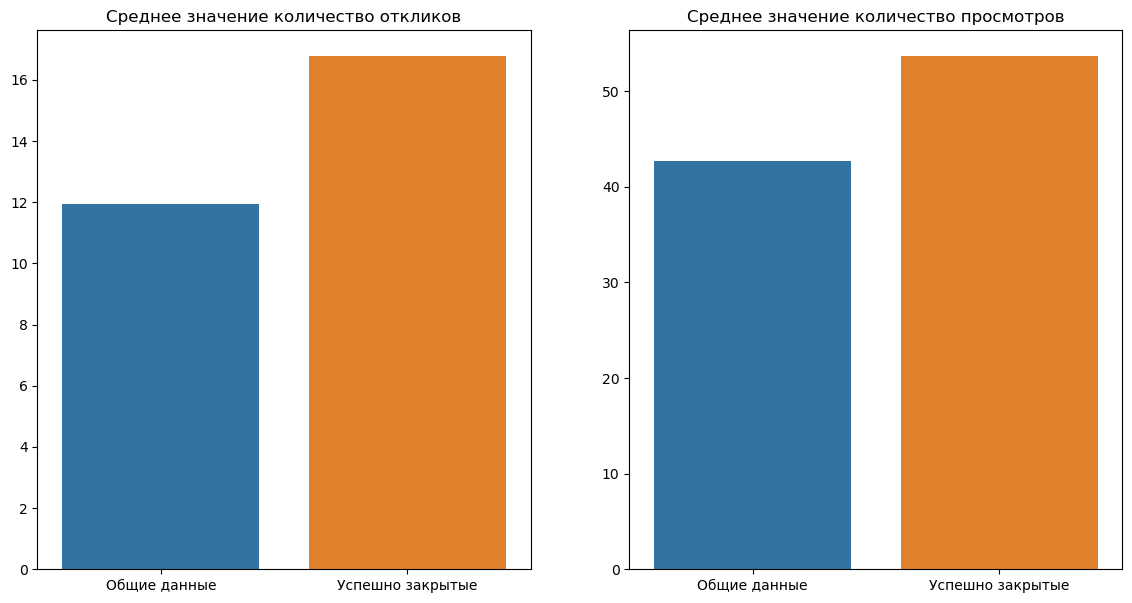

In [52]:
# Столбцы для анализа
columns_to_analyze = ['количество откликов', 'количество просмотров']

# Сравнение для успешно закрытых вакансий
closed_by_us_data = df[df['статус'] == 'Закрыта нами']

# Создание графика
fig, axes = plt.subplots(nrows=1, ncols=len(columns_to_analyze), figsize=(14, 7))

for i, column in enumerate(columns_to_analyze):
    sns.barplot(x=['Общие данные', 'Успешно закрытые'], y=[df[column].mean(), closed_by_us_data[column].mean()], ax=axes[i])
    axes[i].set_title(f'Среднее значение {column}')

plt.show()

# Построение воронки закрытия вакансии

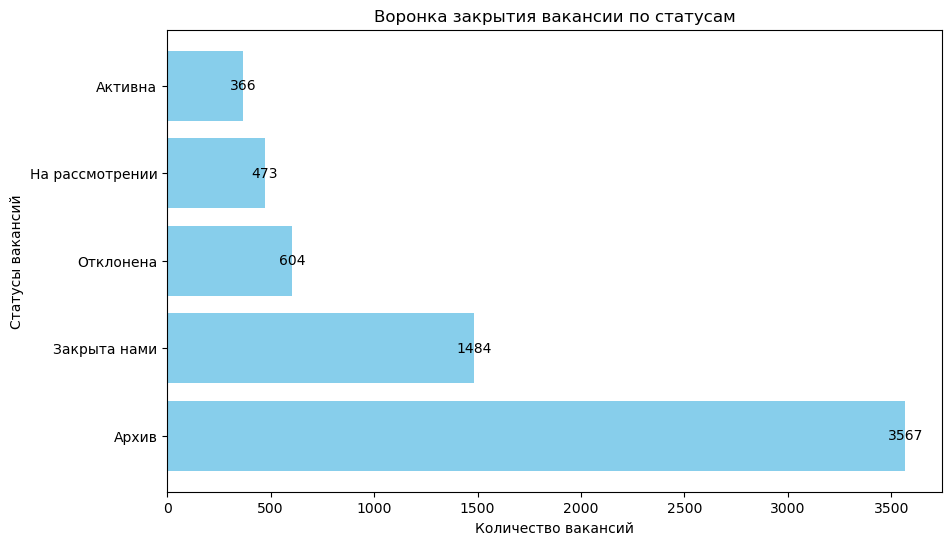

In [53]:
statuses_counts = df['статус'].value_counts()
# Построение воронки
fig, ax = plt.subplots(figsize=(10, 6))
bar_plot = ax.barh(statuses_counts.index, statuses_counts.values, color='skyblue')
ax.set_xlabel('Количество вакансий')
ax.set_ylabel('Статусы вакансий')
ax.set_title('Воронка закрытия вакансии по статусам')

# Добавление чисел на график для каждого статуса
for i, v in enumerate(statuses_counts.values):
    ax.text(v + 0.1, i, str(v), ha='center', va='center', color='black')

plt.show()

# Выдвижение гипотез и их опровержение / проверка

                                          1 Гипотеза 

Удаленная работа и успешное закрытие вакансий: Успешно закрытые вакансии чаще предоставляют возможность удаленной работы. Вероятно, это связано с тем, что удаленная работа становится более привлекательной для кандидатов и способствует успешному закрытию вакансий.

- Нулевая гипотеза (H0):

Средний процент успешно закрытых вакансий с возможностью удаленной работы равен среднему проценту успешно закрытых вакансий без возможности удаленной работы.

- Альтернативная гипотеза (H1):

Средний процент успешно закрытых вакансий с возможностью удаленной работы не равен среднему проценту успешно закрытых вакансий без возможности удаленной работы.

In [54]:
# Присваиваем численные значения столбцу 'статус'
df['статус'] = df['статус'].map({'Архив': 0, 'Закрыта нами': 1, 'Отклонена': 0, 'На рассмотрении': 0, 'Активна': 0})

# Создаем две выборки: вакансии с удаленной работой и без удаленной работы
remote_work_vacancies = df[df['Удаленка'] == 1]['статус']
non_remote_work_vacancies = df[df['Удаленка'] == 0]['статус']

# Проводим двухвыборочный t-тест
t_stat, p_value = stats.ttest_ind(remote_work_vacancies, non_remote_work_vacancies, equal_var=False)

# Оцениваем статистическую значимость
alpha = 0.05
print(f"Уровень значимости: {alpha}")
print(f"Значение p-value: {p_value}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Есть статистически значимые различия.")
else:
    print("Не удалось отвергнуть нулевую гипотезу. Нет статистически значимых различий.")


Уровень значимости: 0.05
Значение p-value: 1.7260392607140595e-25
Отвергаем нулевую гипотезу. Есть статистически значимые различия.


Полученное значение p-value (1.73e-25) крайне мало, что позволяет нам отвергнуть нулевую гипотезу. Это свидетельствует о том, что есть статистически значимые различия между успешно закрытыми вакансиями с удаленной работой и теми, где удаленной работы нет.

Таким образом, можем сделать вывод, что удаленная работа оказывает влияние на успешное закрытие вакансий, и это влияние статистически значимо.

                                              2 Гипотеза

Контрактные отношения: Вакансии, заключенные по контракту, более успешно закрываются. Это может быть связано с тем, что контрактные отношения предоставляют большую гибкость и возможность для обеих сторон.

- Нулевая гипотеза (H0): Средние значения количества откликов на вакансии с контрактными отношениями и без контрактных отношений равны.


- Альтернативная гипотеза (H1): Средние значения количества откликов на вакансии с контрактными отношениями и без контрактных отношений различаются.

In [55]:
# Разделим данные на две группы: вакансии с контрактными отношениями и без контрактных отношений
contract_vacancies = df[df['Контракт'] == 1]['количество откликов']
non_contract_vacancies = df[df['Контракт'] == 0]['количество откликов']

# Проводим двухвыборочный t-тест
t_stat, p_value = stats.ttest_ind(contract_vacancies, non_contract_vacancies, equal_var=False)

# Оцениваем статистическую значимость
alpha = 0.05
print(f"Уровень значимости: {alpha}")
print(f"Значение p-value: {p_value}")

# Принимаем решение по результатам теста
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Есть статистически значимые различия.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу. Различия не являются статистически значимыми.")


Уровень значимости: 0.05
Значение p-value: 0.09843564806868217
Нет оснований отвергнуть нулевую гипотезу. Различия не являются статистически значимыми.


Полученное значение p-value (0.0984) больше выбранного уровня значимости (0.05), поэтому у нас нет оснований отвергнуть нулевую гипотезу. Это означает, что различия в количестве откликов на вакансии с контрактными отношениями и без контрактных отношений не являются статистически значимыми на уровне значимости 0.05.

                                            3 Гипотеза 

Зарплата и количество откликов: Более низкие ожидаемые зарплаты связаны с более высоким числом откликов. Это может свидетельствовать о том, что кандидаты более заинтересованы в вакансиях с конкурентоспособной или ниже рыночной зарплатой.

- H0 (нулевая гипотеза): Нет корреляции между ожидаемой зарплатой и количеством откликов.

- H1 (альтернативная гипотеза): Существует корреляция между ожидаемой зарплатой и количеством откликов.

In [56]:
from scipy.stats import pearsonr

# Исключим строки с пропущенными значениями в 'зарплата от' и 'количество откликов'
filtered_data = df[['зарплата от', 'количество откликов']].dropna()

# Рассчитаем корреляцию Пирсона и p-value
correlation, p_value = pearsonr(filtered_data['зарплата от'], filtered_data['количество откликов'])

# Уровень значимости
alpha = 0.05

# Выведем результаты
print(f"Корреляция: {correlation:.4f}")
print(f"P-value: {p_value:.4e}")

# Проверим гипотезу
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Существует статистически значимая корреляция.")
else:
    print("Нет оснований отвергнуть нулевую гипотезу. Нет статистически значимой корреляции.")


Корреляция: -0.1007
P-value: 4.0856e-07
Отвергаем нулевую гипотезу. Существует статистически значимая корреляция.


Результаты говорят о том, что существует статистически значимая отрицательная корреляция между ожидаемой зарплатой и количеством откликов. Это означает, что при увеличении ожидаемой зарплаты, количество откликов склонно уменьшаться, и наоборот. Таким образом, кандидаты могут быть более заинтересованы в вакансиях с более низкими ожидаемыми зарплатами.

                                               Выводы 

Для улучшения структурированности и стандартизации выбора, рекомендуется использовать выпадающий список (или другой интерфейс с фиксированным набором значений) при заполнении полей. Это поможет предотвратить стихийное заполнение и обеспечит единообразие данных. 
Когда пользователь начинает вводить данные в это поле, система может предложить варианты из списка, и пользователь сможет выбрать нужный формат. Это не только сделает заполнение более удобным, но и уменьшит возможные ошибки и неоднозначность в данных.


    Выводы по вакансиям со статусом 'закрыта нами'

- Источник Лида: Повторная заявка является наиболее успешным источником.

- Город: В основном, успешно закрытые вакансии находятся в Москве.

- Формат работы:Удаленный формат работы более популярен для успешно закрытых вакансий.

- Образование: Образование "Другое, на смежных специальностях" и "Профильное" преобладает среди успешно закрытых вакансий.

- Занятость:Полная занятость является основным форматом занятости для успешно закрытых вакансий.

- Позиция:Вакансии, связанные с разработкой, вероятно, имеют больший успех.

- Знание английского языка: Вакансии, для которых не требуется знание английского языка, также успешно закрываются.
    
    
    
      Количество просмотров и откликов:

- Среднее количество просмотров успешно закрытых вакансий чуть выше (1210.1) по сравнению с общей статистикой (1168.1).

- Среднее количество откликов также выше для успешно закрытых вакансий (53.7 против 40.2).


      Зарплатные ожидания:

- Средняя зарплата "от" на успешно закрытых вакансиях составляет примерно 40334.2, что немного ниже средней зарплаты "от" по общей статистике (47064.7).

- Средняя зарплата "до" также ниже для успешно закрытых вакансий (72689.6) по сравнению с общей статистикой (74808.9).



      Другие признаки:

По другим признакам (ИП, ГПХ, Самозанятость, Контракт, Трудовой договор, Удаленка, Офис, Гибрид, Полная занятость, Волонтерство, Проектная, Частичная занятость, Стажировка) -  преимущественно наблюдается высокий процент встречаемости, близкий к 1.0, что может указывать на популярность этих опций для успешно закрытых вакансий.



      Общий вывод: 

Успешно закрытые вакансии, в среднем, имеют больше просмотров и откликов, а зарплатные ожидания чуть ниже, чем у общей статистики. Также можно отметить, что некоторые опции, такие как удаленная работа, полная занятость и т.д., являются популярными для успешно закрытых вакансий.    

- Количество просмотров и откликов: Успешно закрытые вакансии имеют в среднем более высокие показатели как по просмотрам, так и по откликам.

- Зарплата: Средняя нижняя граница зарплаты успешно закрытых вакансий немного ниже, чем у общих данных. Верхняя граница зарплаты также немного ниже для успешно закрытых вакансий.

- Форматы оформления: Успешно закрытые вакансии имеют близкие или чуть более высокие доли по ИП, Самозанятости, и Удаленке. Форматы Контракт, Трудовой договор, и Офис встречаются примерно в одинаковых пропорциях.

- Форматы работы: Удаленка и Полная занятость преобладают в обоих случаях. Волонтерство и Стажировка также имеют более высокие доли в успешно закрытых вакансиях.

- Типы занятости: Успешно закрытые вакансии чаще связаны с Полной занятостью, Проектной работой и Частичной занятостью.

- Офис и Гибрид: Офисная занятость встречается реже в успешно закрытых вакансиях, чем в общих данных. Гибридная форма работы также менее популярна.

- Специальные формы работы: Проектная работа и Частичная занятость более характерны для успешно закрытых вакансий.

- Волонтерство и Стажировка: Волонтерство и Стажировка более распространены в успешно закрытых вакансиях.

        Исходя из результатов исследования, агентству вакансий можно предложить следующие рекомендации:

- Оптимизация источников лида:

Сделать акцент на повторных заявках как наиболее успешном источнике. Можно расширить использование этих источников и улучшить их эффективность.


- Локализация активности:

Сосредотачиваться на вакансиях в Москве, так как большинство успешно закрытых вакансий приходится на этот город.


- Популяризация удаленной работы:

Акцентировать внимание на удаленной работе, так как она является более популярной для успешно закрытых вакансий. Можно активно продвигать вакансии с этим форматом работы.


- Оптимизация формата оформления:

Учесть, что ИП, ГПХ, Самозанятость, Контракт и Трудовой договор более предпочтительны для успешно закрытых вакансий. Можно активно использовать эти форматы.


- Фокус на полную занятость:

Продолжать акцентировать внимание на вакансиях с полной занятостью, так как они преобладают среди успешно закрытых.


- Оптимизация описания вакансий:

Учитывать, что вакансии, связанные с разработкой, имеют более высокий успех. Можно улучшить описание и требования вакансий этой категории.


- Адаптация зарплатных ожиданий:

Учесть, что успешно закрытые вакансии могут иметь немного более низкие зарплатные ожидания. Важно подбирать конкурентоспособные предложения.


- Усиление популярных опций:

Продолжать предлагать вакансии с популярными опциями (например, удаленка, полная занятость), так как они имеют высокий успех.


- Продвижение волонтерства и стажировок:

Вложить усилия в продвижение вакансий с форматами волонтерства и стажировок, так как они также встречаются с успехом.


- Улучшение формата выбора:

Рекомендовать использование выпадающих списков и стандартизированных интерфейсов для выбора опций при заполнении полей вакансий, чтобы предотвратить стихийное заполнение и обеспечить единообразие данных.
Эти рекомендации могут помочь агентству лучше адаптироваться к предпочтениям кандидатов и улучшить успешность закрытия вакансий.